# <center> Text Mining and Web Scraping Box Office Mojo's Top 200 Lifetime Grossing Films Webpage  </center>

<center> by Yvette Vargas <center>
<center> Professor Sohair Zaki <center>
<center> CISD43: Big Data Modeling & Analysis <center>
<center> June 3, 2022 <center>

### Objective of Project

Students will scrap and text mine a website of their interest while cleaning, saving, and creating conclusions from the data. We have an option to use either tableau or python to do some prediction, visualization, forecasting (optional), and drive the conclusions that will be beneficial. For their project, the following must be incorporated: 

1. Scrapping the website
2. Cleaning the data 
3. Loading the data to data frames
4. Save the data in csv format
5. Use either tableau of python to perform the following: 
 - Exploring your data 
 - Visualization 
 - Prediction 
 - Drive conclusion 

### Topic of Interest and Context

The motion picture industry is a multi-billion dollar business yet determining a film's financial success is largely uncertain and risky. "[F]rom an investor’s standpoint, one would want to be as assured as possible that his/her investment will ultimately lead to returns" (Lash and Zhao, 874-875). However, many would ressonate with the words of American actress, Betty Davis: "[we] do not think the public knows what they want until they see it...[we] can't say what [the public] want to see" (Blank on Blank). 

While there are many variables that contributes to possiblities of a film's financial success, we have various datasets and evidence to at least indicate what potential factors contribute to it. Typically, the most obvious sources are box-office databases.

Created by Brandon Grey in 1998, **Box Office Mojo** is an American website that tracks box-office revenue in a systematic and algorithmic way. As Grey forecasted the top 10 highest grossing films along with box-office analysis since 1999, Box Office Mojo was bought and incorporated in IMDb's platform in 2008. 

We are currently living in a intriguing period of filmmaking and seeing unbelievable box-office records broken. This type of database would be a good starting point for reviewing the highest lifetime grossing films ***(without inflation taken into consideration)***. 


**Sources:** 
- Box Office Mojo's Main Website - https://www.boxofficemojo.com/?ref_=bo_nb_cso_mojologo
- "Top Lifetime Grosses", Box Office Mojo's Main Website - https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?area=XWW
- Box Office Mojo Wikipedia - https://en.wikipedia.org/wiki/WatchMojo
-  Michael T. Lash & Kang Zhao (2016) Early Predictions of Movie Success: The Who, What, and When of Profitability, Journal of Management Information Systems, 33:3, 874-903, DOI: 10.1080/07421222.2016.1243969, https://www.tandfonline.com/doi/pdf/10.1080/07421222.2016.1243969?casa_token=rqzO415yTCcAAAAA:p6ywnemTJ_bgg1N9HBu522kU-Vd4jyTN4q0Q3tEm-3ee0E02YA9L8d74cJBVombo8n058CXtxhrKFNY
https://www.biz.uiowa.edu/faculty/kangzhao/pub/JMIS_2016.pdf
- "Bette Davis on The Sexes" by Blank on Blank (PBS) (September 30, 2014) - https://youtu.be/RNnTUyrxzWY

### Purpose and Research Questions:

I investigate and analyze Box Office Mojo's Top 200 Lifetime Grosses table to obtain insight of how these films performed domestically and internationally. 

**Disclaimer**: there are some limitations that should be addressed: 
* This chart that I have selected are gross incomes that were obtained the day these films were released. **This chart does not consider inflation rates**. Therefore, the films indicated on this chart are ***NOT THE HIGHEST GROSSING FILMS OF ALL TIME.***
* The parameters of this chart are indicated as the following: Domestic (U.S. only), Foreign (non-U.S. countries), and Global/Worldwide (both U.S. and non-U.S.). There is no further indication as far as where and what were the basis of these parameters. Hence, we cannot be certain with what specific markets or countries are contributing to the film's gross incomes. 
* As a student who is familiarizing with Data Science, I plan to keep the project as simplistic as possible. There are other databases that go in-depth into this subject, but for the time being, I wish to keep this project as minimal as possible. 

**Research Questions**
1. Describe what the Domestic and Foreign Gross incomes are. 
2. Describe the Domestic and Foreign Percentages and what we can infer.
3. Describe what the Global Lifetime Gross is. 
4. What year had the most counts in Box Office Mojo's chart? Describe the films.
5. Describe the top 10 in Box Office Mojo's chart.
6. Based on what is shown for the Domestic and Foreign Gross incomes, what is the relationship between both variables?
7. Based on the relationship of the Domestic and Foreign Gross incomes, what is some information that was not addressed in the data that could potentially answer the relationships and/or highlights of the visualization and prediction porition of this project?

# I) Scrapping the Website

**Authorizing an Application to Access HTML Websites and Import Important Libraries**

In [1]:
# Load the packages
import requests

#import BeautifulSoup package
from bs4 import BeautifulSoup

#import other libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#grab the train_test_split from sklearn
from sklearn.model_selection import train_test_split

#import the linearregression model
from sklearn.linear_model import LinearRegression

#to filter warnings
import warnings
warnings.filterwarnings("ignore")

**Indicate website url, receive permission to scrape, and parse website with Beautiful Soup**

In [2]:
# Define a variable for the url of the site
our_site = "https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?area=XWW"

# Making a get request and assign the result to a variable our_response
our_response = requests.get(our_site)

#Check that the response was processed correctly
our_response.status_code

#Output seems to confirm that our site is compatible for web scraping

200

In [3]:
# Extracting the HTML

#assign a variable our_html to our_response content.
our_html = our_response.content

# Checking that the reply is indeed an HTML code by inspecting the first 200 symbols
our_html[:200]

#Double confirmation that site is compatible for web scraping

b'<!doctype html><html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new '

In [4]:
#Create variable to attach BeautifulSoup to webpage's url and parse
our_soup = BeautifulSoup(our_html, "html.parser")

#show webpage's contents
our_soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


    var ue_err_chan = 'jserr-rw';
(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!==m&&c!

In [5]:
# Tables are marked with the 'table' tag in HTML

#Find the Top 200 Lifetime Grossing Films table and show results
our_soup.find_all("table")

[<table class="a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated"><tr><th class="a-text-right mojo-field-type-rank a-nowrap"><span title="Rank">Rank</span>
 </th><th class="a-text-left mojo-field-type-title a-nowrap"><span title="Title">Title</span>
 </th><th class="a-text-right mojo-field-type-money a-nowrap"><span title="Worldwide Lifetime Gross">Worldwide Lifetime Gross</span>
 </th><th class="a-text-right mojo-field-type-money a-nowrap"><span title="Domestic Lifetime Gross">Domestic Lifetime Gross</span>
 </th><th class="a-text-right mojo-field-type-percent a-nowrap"><span title="Domestic %">Domestic %</span>
 </th><th class="a-text-right mojo-field-type-money a-nowrap"><span title="Foreign Lifetime Gross">Foreign Lifetime Gross</span>
 </th><th class="a-text-right mojo-field-type-percent a-nowrap"><span title="Foreign %">Foreign %</span>
 </th><th class="a-text-left mojo-field-type-year a-nowrap"><span title="Year">Year</span>
 </th></tr><tr

In [6]:
#Notice how table is labeled as "table class" above
#anything within " " assigned to the table class needs to be extracted
#Subsets the HTML to only get the HTML of our table needed
table = our_soup.find('table', class_ = 'a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated')

#print table components 
table

<table class="a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated"><tr><th class="a-text-right mojo-field-type-rank a-nowrap"><span title="Rank">Rank</span>
</th><th class="a-text-left mojo-field-type-title a-nowrap"><span title="Title">Title</span>
</th><th class="a-text-right mojo-field-type-money a-nowrap"><span title="Worldwide Lifetime Gross">Worldwide Lifetime Gross</span>
</th><th class="a-text-right mojo-field-type-money a-nowrap"><span title="Domestic Lifetime Gross">Domestic Lifetime Gross</span>
</th><th class="a-text-right mojo-field-type-percent a-nowrap"><span title="Domestic %">Domestic %</span>
</th><th class="a-text-right mojo-field-type-money a-nowrap"><span title="Foreign Lifetime Gross">Foreign Lifetime Gross</span>
</th><th class="a-text-right mojo-field-type-percent a-nowrap"><span title="Foreign %">Foreign %</span>
</th><th class="a-text-left mojo-field-type-year a-nowrap"><span title="Year">Year</span>
</th></tr><tr><td clas

In [7]:
#Gets all the column headers of our table

#create an empty list name it headers
headers = []

#lopp through all the header tags
#save the text in the table header tag after stripping any extra spaces as title
#append this title to the headers list

for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)
    
#print headers
    print(headers)

['Rank']
['Rank', 'Title']
['Rank', 'Title', 'Worldwide Lifetime Gross']
['Rank', 'Title', 'Worldwide Lifetime Gross', 'Domestic Lifetime Gross']
['Rank', 'Title', 'Worldwide Lifetime Gross', 'Domestic Lifetime Gross', 'Domestic %']
['Rank', 'Title', 'Worldwide Lifetime Gross', 'Domestic Lifetime Gross', 'Domestic %', 'Foreign Lifetime Gross']
['Rank', 'Title', 'Worldwide Lifetime Gross', 'Domestic Lifetime Gross', 'Domestic %', 'Foreign Lifetime Gross', 'Foreign %']
['Rank', 'Title', 'Worldwide Lifetime Gross', 'Domestic Lifetime Gross', 'Domestic %', 'Foreign Lifetime Gross', 'Foreign %', 'Year']


In [8]:
#Create a dataframe using the column headers from our table
df = pd.DataFrame(columns = headers)

#print df
df

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year


In [9]:
#now we need to extract components of Box Office Mojo and put them into a dataframe 
#We need for-statement 
for j in table.find_all('tr')[1:]:
    
    #extract header tags 
    row_data = j.find_all('td')
    
    #put text per column into a row
    row = [tr.text for tr in row_data]
    
    #each input will contribute to length of df
    length = len(df)
    
    #for every length contributed will be a row
    df.loc[length] = row

# II) Load the Data to DataFrame

In [10]:
#let us display the dataframe now
df

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year
0,1,Avatar,"$2,847,397,339","$760,507,625",26.7%,"$2,086,889,714",73.3%,2009
1,2,Avengers: Endgame,"$2,797,501,328","$858,373,000",30.7%,"$1,939,128,328",69.3%,2019
2,3,Titanic,"$2,201,647,264","$659,363,944",30%,"$1,542,283,320",70%,1997
3,4,Star Wars: Episode VII - The Force Awakens,"$2,069,521,700","$936,662,225",45.3%,"$1,132,859,475",54.7%,2015
4,5,Avengers: Infinity War,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%,2018
...,...,...,...,...,...,...,...,...
195,196,X-Men: Apocalypse,"$543,934,105","$155,442,489",28.6%,"$388,491,616",71.4%,2016
196,197,Sherlock Holmes: A Game of Shadows,"$543,848,418","$186,848,418",34.4%,"$357,000,000",65.6%,2011
197,198,Despicable Me,"$543,157,985","$251,557,985",46.3%,"$291,600,000",53.7%,2010
198,199,Cinderella,"$542,358,331","$201,151,353",37.1%,"$341,206,978",62.9%,2015


# III) Cleaning the data 

In [11]:
#let's see the info of our dataframe
df.info()

#The dtypes needs to be converted to the following: 
#Percentages need to be floats
#Gross needs to be integers since the amounts are rounded to the whole dollar 
#Title and Year should be objects
#We will need to remove all '-', '%', '$', and ',' in columns with conversions

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Rank                      200 non-null    object
 1   Title                     200 non-null    object
 2   Worldwide Lifetime Gross  200 non-null    object
 3   Domestic Lifetime Gross   200 non-null    object
 4   Domestic %                200 non-null    object
 5   Foreign Lifetime Gross    200 non-null    object
 6   Foreign %                 200 non-null    object
 7   Year                      200 non-null    object
dtypes: object(8)
memory usage: 14.1+ KB


In [12]:
#remove '%' from Domestic % column and create new column "Domestic Percent"
df['Domestic Percent'] = df['Domestic %'].apply(lambda x:x.replace("%", ""))

#show df
df

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year,Domestic Percent
0,1,Avatar,"$2,847,397,339","$760,507,625",26.7%,"$2,086,889,714",73.3%,2009,26.7
1,2,Avengers: Endgame,"$2,797,501,328","$858,373,000",30.7%,"$1,939,128,328",69.3%,2019,30.7
2,3,Titanic,"$2,201,647,264","$659,363,944",30%,"$1,542,283,320",70%,1997,30
3,4,Star Wars: Episode VII - The Force Awakens,"$2,069,521,700","$936,662,225",45.3%,"$1,132,859,475",54.7%,2015,45.3
4,5,Avengers: Infinity War,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%,2018,33.1
...,...,...,...,...,...,...,...,...,...
195,196,X-Men: Apocalypse,"$543,934,105","$155,442,489",28.6%,"$388,491,616",71.4%,2016,28.6
196,197,Sherlock Holmes: A Game of Shadows,"$543,848,418","$186,848,418",34.4%,"$357,000,000",65.6%,2011,34.4
197,198,Despicable Me,"$543,157,985","$251,557,985",46.3%,"$291,600,000",53.7%,2010,46.3
198,199,Cinderella,"$542,358,331","$201,151,353",37.1%,"$341,206,978",62.9%,2015,37.1


In [13]:
#remove '%' from Foreign % column and create new column "Foreign Percent"
df['Foreign Percent'] = df['Foreign %'].apply(lambda x:float(x.replace("%", "")))

#show df
df

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year,Domestic Percent,Foreign Percent
0,1,Avatar,"$2,847,397,339","$760,507,625",26.7%,"$2,086,889,714",73.3%,2009,26.7,73.3
1,2,Avengers: Endgame,"$2,797,501,328","$858,373,000",30.7%,"$1,939,128,328",69.3%,2019,30.7,69.3
2,3,Titanic,"$2,201,647,264","$659,363,944",30%,"$1,542,283,320",70%,1997,30,70.0
3,4,Star Wars: Episode VII - The Force Awakens,"$2,069,521,700","$936,662,225",45.3%,"$1,132,859,475",54.7%,2015,45.3,54.7
4,5,Avengers: Infinity War,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%,2018,33.1,66.9
...,...,...,...,...,...,...,...,...,...,...
195,196,X-Men: Apocalypse,"$543,934,105","$155,442,489",28.6%,"$388,491,616",71.4%,2016,28.6,71.4
196,197,Sherlock Holmes: A Game of Shadows,"$543,848,418","$186,848,418",34.4%,"$357,000,000",65.6%,2011,34.4,65.6
197,198,Despicable Me,"$543,157,985","$251,557,985",46.3%,"$291,600,000",53.7%,2010,46.3,53.7
198,199,Cinderella,"$542,358,331","$201,151,353",37.1%,"$341,206,978",62.9%,2015,37.1,62.9


In [14]:
#Multiple errors for attempting to convert Domestic Percent column from objects to float
#I have found that the errors are rooted from the notation of that some films 
#earned little to no domestically 
#In particular, one value that is causing the trouble in Domestic Percent is '<0.1'

#locate the films that earned less than "<0.1" in the Domestic Percent column
df.loc[df["Domestic Percent"] == "<0.1"]

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year,Domestic Percent,Foreign Percent
62,63,The Battle at Lake Changjin,"$902,540,935","$342,411",<0.1%,"$902,198,524",100%,2021,<0.1,100.0
155,156,Water Gate Bridge,"$626,406,779","$117,294",<0.1%,"$626,289,485",100%,2022,<0.1,100.0


In [15]:
#"<0.1%" is close to 0
#Replace "<0.1%" in Domestic Percent column with 0
df['Domestic Percent'] = df['Domestic Percent'].replace(["<0.1%"], 0)

In [16]:
#To be sure of conversion, create function to convert all values in Domestic Percent to floats
def NegNumFunc(x):
    
    #converts to float  
    try: 
        a = float(x)
    #if 0, returns 0
    except: 
        a = 0
    return a

In [17]:
#Apply NegNumFunction to Domestic Percent column 
#Create new column titled Domestic Float 
df["Domestic Float"] = df["Domestic Percent"].apply(lambda x:NegNumFunc(x))

#show table
df

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year,Domestic Percent,Foreign Percent,Domestic Float
0,1,Avatar,"$2,847,397,339","$760,507,625",26.7%,"$2,086,889,714",73.3%,2009,26.7,73.3,26.7
1,2,Avengers: Endgame,"$2,797,501,328","$858,373,000",30.7%,"$1,939,128,328",69.3%,2019,30.7,69.3,30.7
2,3,Titanic,"$2,201,647,264","$659,363,944",30%,"$1,542,283,320",70%,1997,30,70.0,30.0
3,4,Star Wars: Episode VII - The Force Awakens,"$2,069,521,700","$936,662,225",45.3%,"$1,132,859,475",54.7%,2015,45.3,54.7,45.3
4,5,Avengers: Infinity War,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%,2018,33.1,66.9,33.1
...,...,...,...,...,...,...,...,...,...,...,...
195,196,X-Men: Apocalypse,"$543,934,105","$155,442,489",28.6%,"$388,491,616",71.4%,2016,28.6,71.4,28.6
196,197,Sherlock Holmes: A Game of Shadows,"$543,848,418","$186,848,418",34.4%,"$357,000,000",65.6%,2011,34.4,65.6,34.4
197,198,Despicable Me,"$543,157,985","$251,557,985",46.3%,"$291,600,000",53.7%,2010,46.3,53.7,46.3
198,199,Cinderella,"$542,358,331","$201,151,353",37.1%,"$341,206,978",62.9%,2015,37.1,62.9,37.1


In [18]:
#check to see if functioned worked
#locate values in Domestic Float that are 0.0
df.loc[df["Domestic Float"] == 0.0]

#conversion and function worked

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year,Domestic Percent,Foreign Percent,Domestic Float
62,63,The Battle at Lake Changjin,"$902,540,935","$342,411",<0.1%,"$902,198,524",100%,2021,<0.1,100.0,0.0
85,86,"Hi, Mom","$822,009,764",-,-,"$822,009,764",100%,2021,-,100.0,0.0
134,135,Detective Chinatown 3,"$686,257,563",-,-,"$686,257,563",100%,2021,-,100.0,0.0
155,156,Water Gate Bridge,"$626,406,779","$117,294",<0.1%,"$626,289,485",100%,2022,<0.1,100.0,0.0


In [19]:
#remove '$' from WorldWide Lifetime Gross column and create new column "Global Lifetime $"
df['Global Lifetime $'] = df['Worldwide Lifetime Gross'].apply(lambda x:x.replace("$", ""))

#show table
df

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year,Domestic Percent,Foreign Percent,Domestic Float,Global Lifetime $
0,1,Avatar,"$2,847,397,339","$760,507,625",26.7%,"$2,086,889,714",73.3%,2009,26.7,73.3,26.7,"2,847,397,339"
1,2,Avengers: Endgame,"$2,797,501,328","$858,373,000",30.7%,"$1,939,128,328",69.3%,2019,30.7,69.3,30.7,"2,797,501,328"
2,3,Titanic,"$2,201,647,264","$659,363,944",30%,"$1,542,283,320",70%,1997,30,70.0,30.0,"2,201,647,264"
3,4,Star Wars: Episode VII - The Force Awakens,"$2,069,521,700","$936,662,225",45.3%,"$1,132,859,475",54.7%,2015,45.3,54.7,45.3,"2,069,521,700"
4,5,Avengers: Infinity War,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%,2018,33.1,66.9,33.1,"2,048,359,754"
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,X-Men: Apocalypse,"$543,934,105","$155,442,489",28.6%,"$388,491,616",71.4%,2016,28.6,71.4,28.6,"543,934,105"
196,197,Sherlock Holmes: A Game of Shadows,"$543,848,418","$186,848,418",34.4%,"$357,000,000",65.6%,2011,34.4,65.6,34.4,"543,848,418"
197,198,Despicable Me,"$543,157,985","$251,557,985",46.3%,"$291,600,000",53.7%,2010,46.3,53.7,46.3,"543,157,985"
198,199,Cinderella,"$542,358,331","$201,151,353",37.1%,"$341,206,978",62.9%,2015,37.1,62.9,37.1,"542,358,331"


In [20]:
#remove '$' from Domestic Lifetime Gross column and create new column "Domestic Lifetime $"
df['Domestic Lifetime $'] = df['Domestic Lifetime Gross'].apply(lambda x:x.replace("$", ""))

#show table
df

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year,Domestic Percent,Foreign Percent,Domestic Float,Global Lifetime $,Domestic Lifetime $
0,1,Avatar,"$2,847,397,339","$760,507,625",26.7%,"$2,086,889,714",73.3%,2009,26.7,73.3,26.7,"2,847,397,339","760,507,625"
1,2,Avengers: Endgame,"$2,797,501,328","$858,373,000",30.7%,"$1,939,128,328",69.3%,2019,30.7,69.3,30.7,"2,797,501,328","858,373,000"
2,3,Titanic,"$2,201,647,264","$659,363,944",30%,"$1,542,283,320",70%,1997,30,70.0,30.0,"2,201,647,264","659,363,944"
3,4,Star Wars: Episode VII - The Force Awakens,"$2,069,521,700","$936,662,225",45.3%,"$1,132,859,475",54.7%,2015,45.3,54.7,45.3,"2,069,521,700","936,662,225"
4,5,Avengers: Infinity War,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%,2018,33.1,66.9,33.1,"2,048,359,754","678,815,482"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,X-Men: Apocalypse,"$543,934,105","$155,442,489",28.6%,"$388,491,616",71.4%,2016,28.6,71.4,28.6,"543,934,105","155,442,489"
196,197,Sherlock Holmes: A Game of Shadows,"$543,848,418","$186,848,418",34.4%,"$357,000,000",65.6%,2011,34.4,65.6,34.4,"543,848,418","186,848,418"
197,198,Despicable Me,"$543,157,985","$251,557,985",46.3%,"$291,600,000",53.7%,2010,46.3,53.7,46.3,"543,157,985","251,557,985"
198,199,Cinderella,"$542,358,331","$201,151,353",37.1%,"$341,206,978",62.9%,2015,37.1,62.9,37.1,"542,358,331","201,151,353"


In [21]:
#remove '$' from Foreign Lifetime Gross column and create new column "Foreign Lifetime $"
df['Foreign Lifetime $'] = df['Foreign Lifetime Gross'].apply(lambda x:x.replace("$", ""))

#show table
df

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year,Domestic Percent,Foreign Percent,Domestic Float,Global Lifetime $,Domestic Lifetime $,Foreign Lifetime $
0,1,Avatar,"$2,847,397,339","$760,507,625",26.7%,"$2,086,889,714",73.3%,2009,26.7,73.3,26.7,"2,847,397,339","760,507,625","2,086,889,714"
1,2,Avengers: Endgame,"$2,797,501,328","$858,373,000",30.7%,"$1,939,128,328",69.3%,2019,30.7,69.3,30.7,"2,797,501,328","858,373,000","1,939,128,328"
2,3,Titanic,"$2,201,647,264","$659,363,944",30%,"$1,542,283,320",70%,1997,30,70.0,30.0,"2,201,647,264","659,363,944","1,542,283,320"
3,4,Star Wars: Episode VII - The Force Awakens,"$2,069,521,700","$936,662,225",45.3%,"$1,132,859,475",54.7%,2015,45.3,54.7,45.3,"2,069,521,700","936,662,225","1,132,859,475"
4,5,Avengers: Infinity War,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%,2018,33.1,66.9,33.1,"2,048,359,754","678,815,482","1,369,544,272"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,X-Men: Apocalypse,"$543,934,105","$155,442,489",28.6%,"$388,491,616",71.4%,2016,28.6,71.4,28.6,"543,934,105","155,442,489","388,491,616"
196,197,Sherlock Holmes: A Game of Shadows,"$543,848,418","$186,848,418",34.4%,"$357,000,000",65.6%,2011,34.4,65.6,34.4,"543,848,418","186,848,418","357,000,000"
197,198,Despicable Me,"$543,157,985","$251,557,985",46.3%,"$291,600,000",53.7%,2010,46.3,53.7,46.3,"543,157,985","251,557,985","291,600,000"
198,199,Cinderella,"$542,358,331","$201,151,353",37.1%,"$341,206,978",62.9%,2015,37.1,62.9,37.1,"542,358,331","201,151,353","341,206,978"


In [22]:
##remove ',' from Foreign Lifetime $ column and convert to integers
df['Foreign Lifetime $'].str.replace(',', '').astype(int)

#show table
df

#Notice how the commas are not removed or the change to integers 
#This means will have to break our steps

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year,Domestic Percent,Foreign Percent,Domestic Float,Global Lifetime $,Domestic Lifetime $,Foreign Lifetime $
0,1,Avatar,"$2,847,397,339","$760,507,625",26.7%,"$2,086,889,714",73.3%,2009,26.7,73.3,26.7,"2,847,397,339","760,507,625","2,086,889,714"
1,2,Avengers: Endgame,"$2,797,501,328","$858,373,000",30.7%,"$1,939,128,328",69.3%,2019,30.7,69.3,30.7,"2,797,501,328","858,373,000","1,939,128,328"
2,3,Titanic,"$2,201,647,264","$659,363,944",30%,"$1,542,283,320",70%,1997,30,70.0,30.0,"2,201,647,264","659,363,944","1,542,283,320"
3,4,Star Wars: Episode VII - The Force Awakens,"$2,069,521,700","$936,662,225",45.3%,"$1,132,859,475",54.7%,2015,45.3,54.7,45.3,"2,069,521,700","936,662,225","1,132,859,475"
4,5,Avengers: Infinity War,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%,2018,33.1,66.9,33.1,"2,048,359,754","678,815,482","1,369,544,272"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,X-Men: Apocalypse,"$543,934,105","$155,442,489",28.6%,"$388,491,616",71.4%,2016,28.6,71.4,28.6,"543,934,105","155,442,489","388,491,616"
196,197,Sherlock Holmes: A Game of Shadows,"$543,848,418","$186,848,418",34.4%,"$357,000,000",65.6%,2011,34.4,65.6,34.4,"543,848,418","186,848,418","357,000,000"
197,198,Despicable Me,"$543,157,985","$251,557,985",46.3%,"$291,600,000",53.7%,2010,46.3,53.7,46.3,"543,157,985","251,557,985","291,600,000"
198,199,Cinderella,"$542,358,331","$201,151,353",37.1%,"$341,206,978",62.9%,2015,37.1,62.9,37.1,"542,358,331","201,151,353","341,206,978"


In [23]:
#Convert "Foreign Lifetime $" column to string dtype
df["Foreign Lifetime $"].astype(str)

0      2,086,889,714
1      1,939,128,328
2      1,542,283,320
3      1,132,859,475
4      1,369,544,272
           ...      
195      388,491,616
196      357,000,000
197      291,600,000
198      341,206,978
199      348,468,325
Name: Foreign Lifetime $, Length: 200, dtype: object

In [24]:
#Convert "Domestic Lifetime $" column to string dtype
df["Domestic Lifetime $"].astype(str)

0      760,507,625
1      858,373,000
2      659,363,944
3      936,662,225
4      678,815,482
          ...     
195    155,442,489
196    186,848,418
197    251,557,985
198    201,151,353
199    193,595,521
Name: Domestic Lifetime $, Length: 200, dtype: object

In [25]:
#Convert "Global Lifetime $" column to string dtype
df["Global Lifetime $"].astype(str)

0      2,847,397,339
1      2,797,501,328
2      2,201,647,264
3      2,069,521,700
4      2,048,359,754
           ...      
195      543,934,105
196      543,848,418
197      543,157,985
198      542,358,331
199      542,063,846
Name: Global Lifetime $, Length: 200, dtype: object

In [26]:
#Convert "Foreign Lifetime $" column to float, drop ',' and create new column "Foreign_Lifetime_Gross_float"
df["Foreign_Lifetime_Gross_float"] = df["Foreign Lifetime $"].str.replace(',','').astype(float)

#Display results 
df["Foreign_Lifetime_Gross_float"]

0      2.086890e+09
1      1.939128e+09
2      1.542283e+09
3      1.132859e+09
4      1.369544e+09
           ...     
195    3.884916e+08
196    3.570000e+08
197    2.916000e+08
198    3.412070e+08
199    3.484683e+08
Name: Foreign_Lifetime_Gross_float, Length: 200, dtype: float64

In [27]:
#Convert "Foreign Lifetime $" column to int64 and create new column "Foreign_Lifetime_Gross_int"
df["Foreign_Lifetime_Gross_int"] = df["Foreign_Lifetime_Gross_float"].astype('int64')

#Display results
df["Foreign_Lifetime_Gross_int"]

0      2086889714
1      1939128328
2      1542283320
3      1132859475
4      1369544272
          ...    
195     388491616
196     357000000
197     291600000
198     341206978
199     348468325
Name: Foreign_Lifetime_Gross_int, Length: 200, dtype: int64

In [28]:
#During conversions for "Domestic Lifetime $", there was a notation "-"
#this indicates that there is no data for that film in that column 

#locate all "-" values in Domestic Lifetime $ column
df.loc[df["Domestic Lifetime $"] == "-"]

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year,Domestic Percent,Foreign Percent,Domestic Float,Global Lifetime $,Domestic Lifetime $,Foreign Lifetime $,Foreign_Lifetime_Gross_float,Foreign_Lifetime_Gross_int
85,86,"Hi, Mom","$822,009,764",-,-,"$822,009,764",100%,2021,-,100.0,0.0,"822,009,764",-,"822,009,764",822009764.0,822009764
134,135,Detective Chinatown 3,"$686,257,563",-,-,"$686,257,563",100%,2021,-,100.0,0.0,"686,257,563",-,"686,257,563",686257563.0,686257563


In [29]:
#Replace "-" to 0 in "Domestic Lifetime $" and create new column "Domestic_Lifetime_Gross_"
df['Domestic_Lifetime_Gross_'] = df['Domestic Lifetime $'].apply(lambda x:x.replace("-", "0"))

#Locate index 85 to see if column and value changes are shown 
df.loc[df.index[85]]

#successful

Rank                                      86
Title                                Hi, Mom
Worldwide Lifetime Gross        $822,009,764
Domestic Lifetime Gross                    -
Domestic %                                 -
Foreign Lifetime Gross          $822,009,764
Foreign %                               100%
Year                                    2021
Domestic Percent                           -
Foreign Percent                        100.0
Domestic Float                           0.0
Global Lifetime $                822,009,764
Domestic Lifetime $                        -
Foreign Lifetime $               822,009,764
Foreign_Lifetime_Gross_float     822009764.0
Foreign_Lifetime_Gross_int         822009764
Domestic_Lifetime_Gross_                   0
Name: 85, dtype: object

In [30]:
#Convert "Domestic_Lifetime_Gross" column to float, drop ',' and create new column "Domestic_Lifetime_Gross_float"
df["Domestic_Lifetime_Gross_float"] = df["Domestic_Lifetime_Gross_"].str.replace(',','').astype(float)

#Display results
df["Domestic_Lifetime_Gross_float"]

0      760507625.0
1      858373000.0
2      659363944.0
3      936662225.0
4      678815482.0
          ...     
195    155442489.0
196    186848418.0
197    251557985.0
198    201151353.0
199    193595521.0
Name: Domestic_Lifetime_Gross_float, Length: 200, dtype: float64

In [31]:
#Convert "Domestic_Lifetime_Gross" column to int64 and create new column "Domestic_Lifetime_Gross_int"
df["Domestic_Lifetime_Gross_int"] = df["Domestic_Lifetime_Gross_float"].astype('int64')

#Display results
df["Domestic_Lifetime_Gross_int"]

0      760507625
1      858373000
2      659363944
3      936662225
4      678815482
         ...    
195    155442489
196    186848418
197    251557985
198    201151353
199    193595521
Name: Domestic_Lifetime_Gross_int, Length: 200, dtype: int64

In [32]:
#Convert "Global Lifetime $" column to string dtype
df["Global Lifetime $"].astype(str)

0      2,847,397,339
1      2,797,501,328
2      2,201,647,264
3      2,069,521,700
4      2,048,359,754
           ...      
195      543,934,105
196      543,848,418
197      543,157,985
198      542,358,331
199      542,063,846
Name: Global Lifetime $, Length: 200, dtype: object

In [33]:
#Convert "Global Lifetime $" column to int64, drop ',' and create new column "Global_Lifetime_Gross_int"
df["Global_Lifetime_Gross_int"] = df["Global Lifetime $"].str.replace(',', '').astype('int64')

#Display Results 
df["Global_Lifetime_Gross_int"]

0      2847397339
1      2797501328
2      2201647264
3      2069521700
4      2048359754
          ...    
195     543934105
196     543848418
197     543157985
198     542358331
199     542063846
Name: Global_Lifetime_Gross_int, Length: 200, dtype: int64

In [34]:
#Let's see our progress so far
df.info()

#We have converted the columns of interest 
#Now we need to drop the rows we do not need

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           200 non-null    object 
 1   Title                          200 non-null    object 
 2   Worldwide Lifetime Gross       200 non-null    object 
 3   Domestic Lifetime Gross        200 non-null    object 
 4   Domestic %                     200 non-null    object 
 5   Foreign Lifetime Gross         200 non-null    object 
 6   Foreign %                      200 non-null    object 
 7   Year                           200 non-null    object 
 8   Domestic Percent               200 non-null    object 
 9   Foreign Percent                200 non-null    float64
 10  Domestic Float                 200 non-null    float64
 11  Global Lifetime $              200 non-null    object 
 12  Domestic Lifetime $            200 non-null    obj

In [35]:
#Permanently drop the following columns:
#"Rank","Worldwide Lifetime Gross", "Domestic Lifetime Gross", "Foreign Lifetime GrossDomestic %", "Foreign %", 
#"Domestic Percent", "Global Lifetime $", "Domestic Lifetime $","Foreign Lifetime $", "Foreign_Lifetime_Gross_float", 
#"Domestic_Lifetime_Gross_float", "Domestic_Lifetime_Gross_"

df.drop(["Rank","Worldwide Lifetime Gross", "Domestic Lifetime Gross", "Foreign Lifetime Gross",
        "Domestic %", "Foreign %", "Domestic Percent", "Global Lifetime $", "Domestic Lifetime $",
        "Foreign Lifetime $", "Foreign_Lifetime_Gross_float", "Domestic_Lifetime_Gross_float", 
        "Domestic_Lifetime_Gross_"], axis =1, inplace = True)

In [36]:
#Display results 
df

#We will need rename some of our columns 

,Title,Year,Foreign Percent,Domestic Float,Foreign_Lifetime_Gross_int,Domestic_Lifetime_Gross_int,Global_Lifetime_Gross_int
0,Avatar,2009,73.3,26.7,2086889714,760507625,2847397339
1,Avengers: Endgame,2019,69.3,30.7,1939128328,858373000,2797501328
2,Titanic,1997,70.0,30.0,1542283320,659363944,2201647264
3,Star Wars: Episode VII - The Force Awakens,2015,54.7,45.3,1132859475,936662225,2069521700
4,Avengers: Infinity War,2018,66.9,33.1,1369544272,678815482,2048359754
...,...,...,...,...,...,...,...
195,X-Men: Apocalypse,2016,71.4,28.6,388491616,155442489,543934105
196,Sherlock Holmes: A Game of Shadows,2011,65.6,34.4,357000000,186848418,543848418
197,Despicable Me,2010,53.7,46.3,291600000,251557985,543157985
198,Cinderella,2015,62.9,37.1,341206978,201151353,542358331


In [37]:
#double check to see the desired columns and dtypes are present 
df.info()

#Yes they are 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        200 non-null    object 
 1   Year                         200 non-null    object 
 2   Foreign Percent              200 non-null    float64
 3   Domestic Float               200 non-null    float64
 4   Foreign_Lifetime_Gross_int   200 non-null    int64  
 5   Domestic_Lifetime_Gross_int  200 non-null    int64  
 6   Global_Lifetime_Gross_int    200 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 20.6+ KB


In [38]:
#Rename following columns: 
#'Domestic Float', 'Domestic_Lifetime_Gross_int','Foreign_Lifetime_Gross_int'

df.rename(columns={'Domestic Float': 'Domestic Percent', 'Domestic_Lifetime_Gross_int': 'Domestic Lifetime Gross',
                  'Foreign_Lifetime_Gross_int':'Foreign Lifetime Gross'}, inplace=True)

In [39]:
#Rename following columns:
#'Global_Lifetime_Gross_int'

df.rename(columns={'Global_Lifetime_Gross_int': 'Global Lifetime Gross'}, inplace=True)

In [40]:
#Display Results 
df

,Title,Year,Foreign Percent,Domestic Percent,Foreign Lifetime Gross,Domestic Lifetime Gross,Global Lifetime Gross
0,Avatar,2009,73.3,26.7,2086889714,760507625,2847397339
1,Avengers: Endgame,2019,69.3,30.7,1939128328,858373000,2797501328
2,Titanic,1997,70.0,30.0,1542283320,659363944,2201647264
3,Star Wars: Episode VII - The Force Awakens,2015,54.7,45.3,1132859475,936662225,2069521700
4,Avengers: Infinity War,2018,66.9,33.1,1369544272,678815482,2048359754
...,...,...,...,...,...,...,...
195,X-Men: Apocalypse,2016,71.4,28.6,388491616,155442489,543934105
196,Sherlock Holmes: A Game of Shadows,2011,65.6,34.4,357000000,186848418,543848418
197,Despicable Me,2010,53.7,46.3,291600000,251557985,543157985
198,Cinderella,2015,62.9,37.1,341206978,201151353,542358331


## Cleaning is complete.

# IV) Save the data in csv format 

In [41]:
#Save df as a csv file 
df.to_csv(r'C:\Users\Yvette\Desktop\CISD43 Jupyter Files\CISD43_Text_Mining_WebPages_Notebooks\CISD43 Text Mining Webpages Project\data\Watch_Mojo_Top_200_Lifetime_Grossing_Films.csv')

## You can find file in the "data" folder. 

# V) Explore and Visualize Data 

In [42]:
#List the basic statistical info of our dataframe
df.describe()

#Note: since our data constitutes amounts in the hundred billions, 
#values will be indicated in float format for display purposes

,Foreign Percent,Domestic Percent,Foreign Lifetime Gross,Domestic Lifetime Gross,Global Lifetime Gross
count,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,65.600000,34.400000,5.707232e+08,3.001940e+08,8.709172e+08
std,11.624878,11.624878,2.504617e+08,1.509244e+08,3.498215e+08
min,36.000000,0.000000,1.973000e+08,0.000000e+00,5.420638e+08
25%,58.325000,28.950000,4.160727e+08,2.097277e+08,6.413363e+08
50%,65.300000,34.700000,5.091530e+08,2.908439e+08,7.872888e+08
75%,71.050000,41.675000,6.591262e+08,3.681451e+08,9.723421e+08
max,100.000000,64.000000,2.086890e+09,9.366622e+08,2.847397e+09


## Domestic and Foreign Lifetime Gross

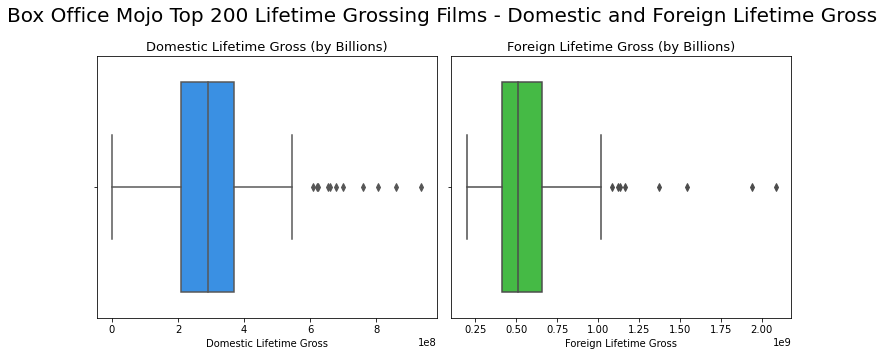

In [43]:
#Create function for subplots and figuresize 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create overall title
fig.suptitle('Box Office Mojo Top 200 Lifetime Grossing Films - Domestic and Foreign Lifetime Gross', fontsize = 20)

#Create boxplot for "Domestic Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[0], x=df["Domestic Lifetime Gross"], color = "dodgerblue")
axes[0].set_title("Domestic Lifetime Gross (by Billions)", fontsize = 13)

#Create boxplot for "Foreign Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[1], x=df["Foreign Lifetime Gross"], color = "limegreen")
axes[1].set_title("Foreign Lifetime Gross (by Billions)", fontsize = 13)

#Tighten layout
fig.tight_layout()

### As suspected, there are 10 outliers in our data. Given that the context and nature of my project is focused on the lifetime grossing films when they were first released, this would suggest that I would not clean the outliers. HOWEVER, let's see what would happen if I were to clean the data.  First thing before doing so is to get our basic information regarding the shown boxplots above. 

In [44]:
#WE WILL USE THIS FUNCTION THROUGHOUT THE PROJECT FOR IDENTIFYING OUR BOXPLOT COMPOMENTS 
#Create function to get our labels for boxplots 
def get_box_plot_data(labels, bp):
    rows_list = []

#This will extract data into all components of boxplot
    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

#Will return data into a compiled dataframe 
    return pd.DataFrame(rows_list)

,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker
0,Domestic Lifteime Gross,0.0,209727732.0,290843887.0,3.681451e+08,5.436380e+08
1,Foreign Lifetime Gross,197300000.0,416072657.0,509152962.0,6.591262e+08,1.018131e+09


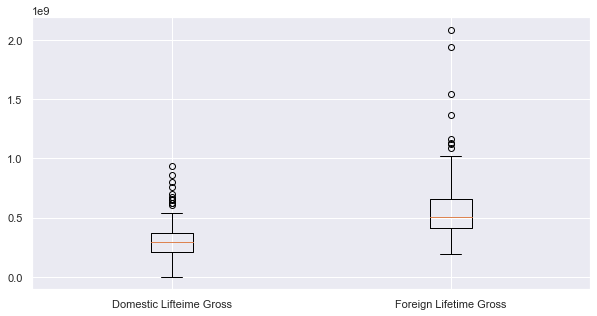

In [117]:
#Asssigned variables to columns
data1 = df["Domestic Lifetime Gross"]
data2 = df["Foreign Lifetime Gross"]

#Create Labels for columns 
labels = ['Domestic Lifteime Gross', 'Foreign Lifetime Gross']

#Create boxplot fore reference 
bp = plt.boxplot([data1, data2,], labels=labels)

#print results 
get_box_plot_data(labels, bp)


Now that this information is outlined, now we can start cleaning both Domestic and Foreign Lifetime Grosses. 

**Find IQR of Domestic Lifetime Gross column**

In [89]:
#Finding the IQR
percentile25 = df['Domestic Lifetime Gross'].quantile(0.25)
percentile75 = df['Domestic Lifetime Gross'].quantile(0.75)

#IQR
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#Finding Outliers
df[df['Domestic Lifetime Gross'] > upper_limit]
df[df['Domestic Lifetime Gross'] < lower_limit]

#Trimming
new_df = df[df['Domestic Lifetime Gross'] < upper_limit]

new_df.shape

(189, 7)

**Visualizing Cleaned Domestic Lifetime Gross column***

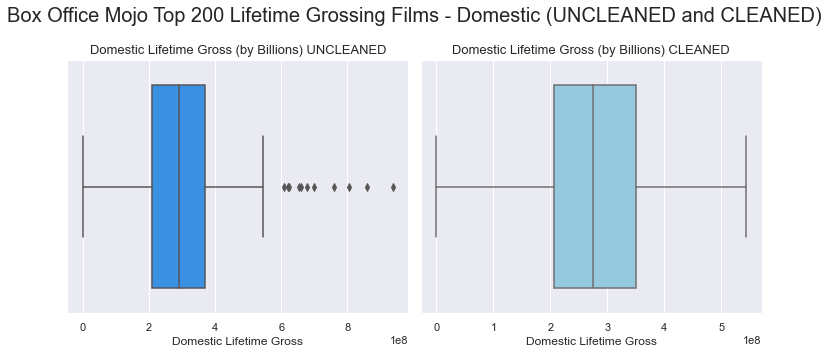

In [100]:
#Create function for subplots and figuresize 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create overall title
fig.suptitle('Box Office Mojo Top 200 Lifetime Grossing Films - Domestic (UNCLEANED and CLEANED)', fontsize = 20)

#Create boxplot for "Domestic Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[0], x=df["Domestic Lifetime Gross"], color = "dodgerblue")
axes[0].set_title("Domestic Lifetime Gross (by Billions) UNCLEANED", fontsize = 13)

#Create boxplot for "Foreign Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[1], x=new_df["Domestic Lifetime Gross"], color = "skyblue")
axes[1].set_title("Domestic Lifetime Gross (by Billions) CLEANED", fontsize = 13)

#Tighten layout
fig.tight_layout()

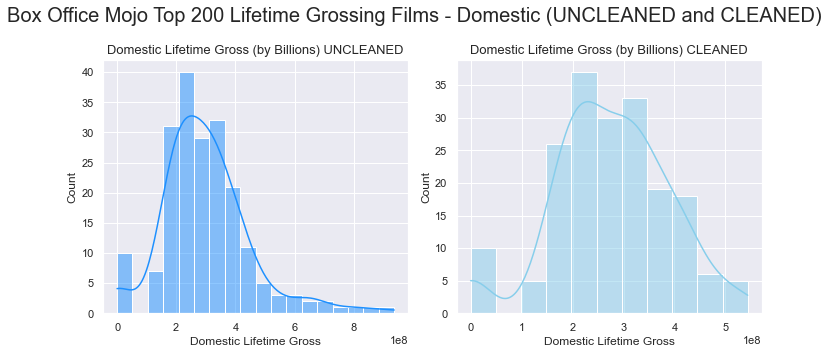

In [102]:
#Create function for subplots and figuresize 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create overall title
fig.suptitle('Box Office Mojo Top 200 Lifetime Grossing Films - Domestic (UNCLEANED and CLEANED)', fontsize = 20)

#Create boxplot for "Domestic Percent", set color, title, and fontsize  
sns.histplot(ax=axes[0], x=df["Domestic Lifetime Gross"], color = "dodgerblue", kde = True)
axes[0].set_title("Domestic Lifetime Gross (by Billions) UNCLEANED", fontsize = 13)

#Create boxplot for "Foreign Percent", set color, title, and fontsize  
sns.histplot(ax=axes[1], x=new_df["Domestic Lifetime Gross"], color = "skyblue", kde = True)
axes[1].set_title("Domestic Lifetime Gross (by Billions) CLEANED", fontsize = 13)

#Tighten layout
fig.tight_layout()

### Despite the UNCLEANED data to the left is positively skewed, the CLEANED data to the right is not symmetircal. Therefore, this sets the premise that our data is varied and will not be evenly distributed.

In [119]:
#Create function to get our labels for boxplots 
def get_box_plot_data(labels, bp):
    rows_list = []

#This will extract data into all components of boxplot
    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

#Will return data into a compiled dataframe 
    return pd.DataFrame(rows_list)

,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker
0,Domestic Lifteime Gross,0.0,2.080206e+08,281431797.0,3.558998e+08,534987076.0


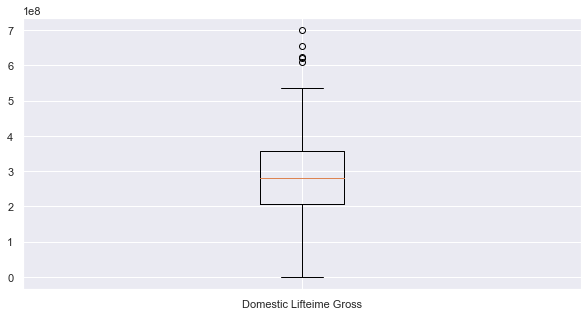

In [122]:
#Asssigned variables to columns
data1 = new_df["Domestic Lifetime Gross"]

#Create Labels for columns 
labels = ['Domestic Lifteime Gross']

#Create boxplot
bp = plt.boxplot(data1, labels=labels)
                 
#print results 
get_box_plot_data(labels, bp)

**Find IQR of Foreign Lifetime Gross column**

In [109]:
#Finding the IQR
percentile25 = df['Foreign Lifetime Gross'].quantile(0.25)
percentile75 = df['Foreign Lifetime Gross'].quantile(0.75)

#IQR
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#Finding Outliers
df[df['Foreign Lifetime Gross'] > upper_limit]
df[df['Foreign Lifetime Gross'] < lower_limit]

#Trimming and shape
new_df = df[df['Foreign Lifetime Gross'] < upper_limit]
new_df.shape

(192, 7)

**Visualizing Cleaned Foreign Lifetime Gross column**

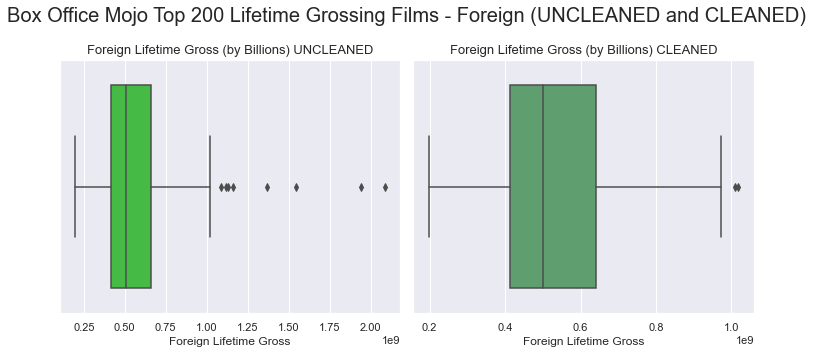

In [114]:
#Create function for subplots and figuresize 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create overall title
fig.suptitle('Box Office Mojo Top 200 Lifetime Grossing Films - Foreign (UNCLEANED and CLEANED)', fontsize = 20)

#Create boxplot for "Domestic Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[0], x=df["Foreign Lifetime Gross"], color = "limegreen")
axes[0].set_title("Foreign Lifetime Gross (by Billions) UNCLEANED", fontsize = 13)

#Create boxplot for "Foreign Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[1], x=new_df["Foreign Lifetime Gross"], color = "g")
axes[1].set_title("Foreign Lifetime Gross (by Billions) CLEANED", fontsize = 13)

#Tighten layout
fig.tight_layout()

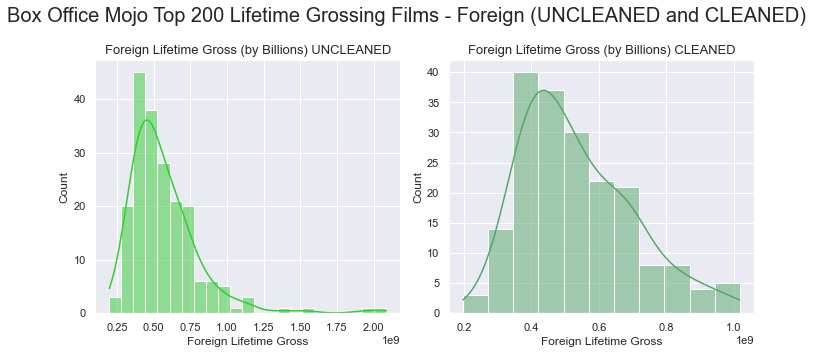

In [115]:
#Create function for subplots and figuresize 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create overall title
fig.suptitle('Box Office Mojo Top 200 Lifetime Grossing Films - Foreign (UNCLEANED and CLEANED)', fontsize = 20)

#Create boxplot for "Domestic Percent", set color, title, and fontsize  
sns.histplot(ax=axes[0], x=df["Foreign Lifetime Gross"], color = "limegreen", kde = True)
axes[0].set_title("Foreign Lifetime Gross (by Billions) UNCLEANED", fontsize = 13)

#Create boxplot for "Foreign Percent", set color, title, and fontsize  
sns.histplot(ax=axes[1], x=new_df["Foreign Lifetime Gross"], color = "g", kde = True)
axes[1].set_title("Foreign Lifetime Gross (by Billions) CLEANED", fontsize = 13)

#Tighten layout
fig.tight_layout()

,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker
0,Foreign Lifteime Gross,197300000.0,412409199.5,501184763.0,6.412634e+08,972653355.0


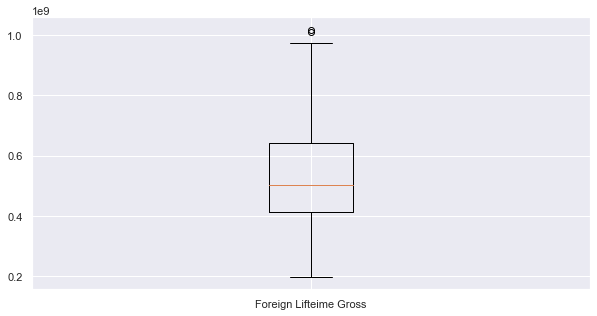

In [123]:
#Asssigned variables to columns
data1 = new_df["Foreign Lifetime Gross"]

#Create Labels for columns 
labels = ['Foreign Lifteime Gross']

#Create boxplot
bp = plt.boxplot(data1, labels=labels)
                 
#print results 
get_box_plot_data(labels, bp)

# 1. Describe what the Domestic and Foreign Gross incomes are.

Overall, it is clear that the data is for the most part skewed to left and 10 outliers are responsbile for it.(These outliers will be reflected in the top 10 list further in this project). The nature of this data is non-symmetrical as suspsected and reinforced by the removal of the outliers.  

In short summary of what was found from the uncleaned and cleaned Domestic and Foreign Lifetime Grosses, the results follows (in hundred billions): 

UNCLEANED               lower_whisker	lower_quartile	  median	    upper_quartile	upper_whisker
Domestic Lifteime Gross	0.0	            209727732.0	      290843887.0	3.681451e+08	5.436380e+08
Foreign Lifetime Gross	197300000.0	    416072657.0	      509152962.0	6.591262e+08	1.018131e+09                        
                        
CLEANED                 lower_whisker	lower_quartile	  median	    upper_quartile	upper_whisker
Domestic Lifteime Gross	0.0	            206445654.0	      274092705.0	350159020.0	    543638043.0
Foreign Lifteime Gross	197300000.0	    412409199.5	      501184763.0	6.412634e+08	972653355.0

## With the consideration of cleaning, the percentages changes...

## Domestic and Foreign Percentages

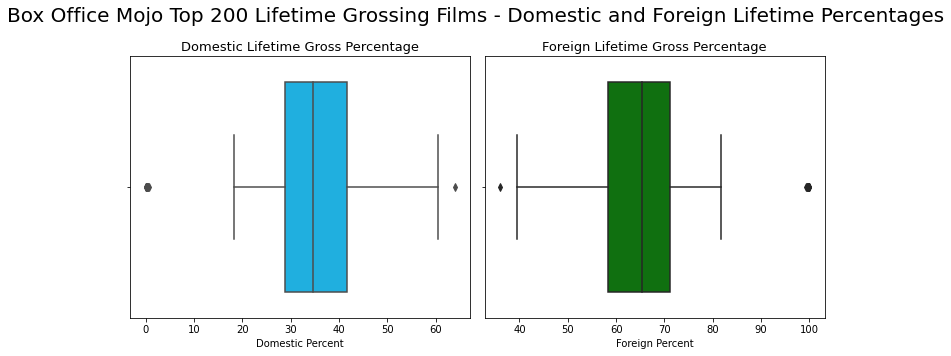

In [48]:
#Create function for subplots and figuresize 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create overall title
fig.suptitle('Box Office Mojo Top 200 Lifetime Grossing Films - Domestic and Foreign Lifetime Percentages', fontsize = 20)

#Create boxplot for "Domestic Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[0], x=df["Domestic Percent"], color = "deepskyblue")
axes[0].set_title("Domestic Lifetime Gross Percentage", fontsize = 13)

#Create boxplot for "Foreign Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[1], x=df["Foreign Percent"], color = "g")
axes[1].set_title("Foreign Lifetime Gross Percentage", fontsize = 13)

#Tighten layout
fig.tight_layout()

In [130]:
#Create function to get our labels for boxplots 
def get_box_plot_data(labels, bp):
    rows_list = []

#This will extract data into all components of boxplot
    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

#Will return data into a compiled dataframe 
    return pd.DataFrame(rows_list)

,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker
0,Domestic Percent,18.3,28.950,34.7,41.675,60.6
1,Foreign Percent,39.4,58.325,65.3,71.050,81.7


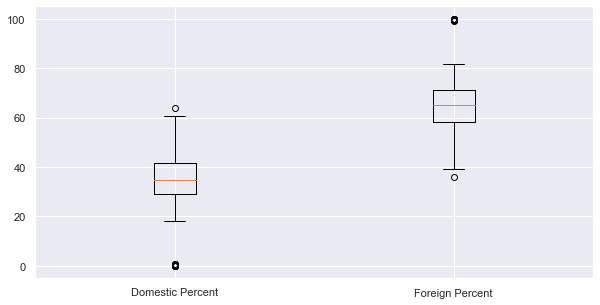

In [131]:
#Asssigned variables to columns
data1 = df["Domestic Percent"]
data2 = df["Foreign Percent"]

#Create Labels for columns 
labels = ['Domestic Percent', 'Foreign Percent']

#Create boxplot fore reference 
bp = plt.boxplot([data1, data2,], labels=labels)

#print results 
get_box_plot_data(labels, bp)

## Domestic Percent

**Find IQR of Domestic Percent column**

In [132]:
#Finding the IQR
percentile25 = df['Domestic Percent'].quantile(0.25)
percentile75 = df['Domestic Percent'].quantile(0.75)

#IQR
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#Finding Outliers
df[df['Domestic Percent'] > upper_limit]
df[df['Domestic Percent'] < lower_limit]

#Trimming
new_df = df[df['Domestic Percent'] < upper_limit]

new_df.shape

(199, 7)

**Visualizing Uncleaned and Cleaned Domestic Percentage column**

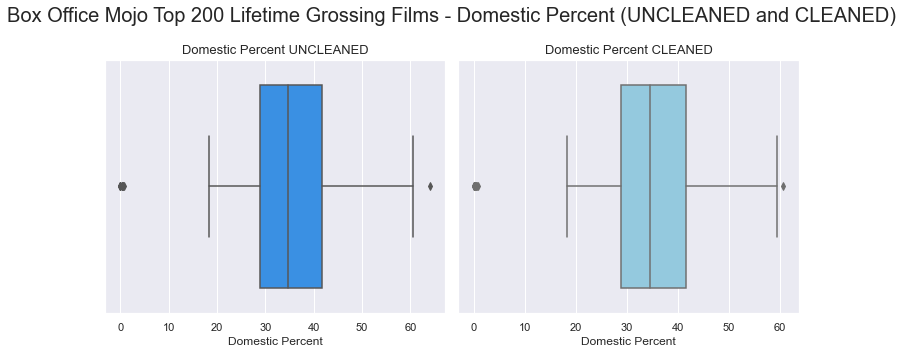

In [133]:
#Create function for subplots and figuresize 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create overall title
fig.suptitle('Box Office Mojo Top 200 Lifetime Grossing Films - Domestic Percent (UNCLEANED and CLEANED)', fontsize = 20)

#Create boxplot for "Domestic Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[0], x=df["Domestic Percent"], color = "dodgerblue")
axes[0].set_title("Domestic Percent UNCLEANED", fontsize = 13)

#Create boxplot for "Foreign Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[1], x=new_df["Domestic Percent"], color = "skyblue")
axes[1].set_title("Domestic Percent CLEANED", fontsize = 13)

#Tighten layout
fig.tight_layout()

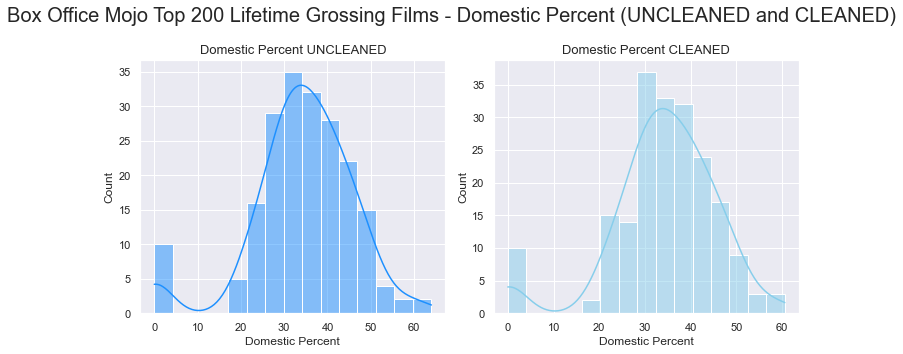

In [136]:
#Create function for subplots and figuresize 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create overall title
fig.suptitle('Box Office Mojo Top 200 Lifetime Grossing Films - Domestic Percent (UNCLEANED and CLEANED)', fontsize = 20)

#Create boxplot for "Domestic Percent", set color, title, and fontsize  
sns.histplot(ax=axes[0], x=df["Domestic Percent"], color = "dodgerblue", kde = True)
axes[0].set_title("Domestic Percent UNCLEANED", fontsize = 13)

#Create boxplot for "Foreign Percent", set color, title, and fontsize  
sns.histplot(ax=axes[1], x=new_df["Domestic Percent"], color = "skyblue", kde = True)
axes[1].set_title("Domestic Percent CLEANED", fontsize = 13)

#Tighten layout
fig.tight_layout()

### One would assume that what we saw in the UNCLEANED and CLEANED Domestic and Foreign Lifetime Gross would have a similar effect on the Domestic and Foreign Percentages. It seems that  the CLEANING was a slight impact on the overall percentages and has preserved the negatively skewedness of the dataset.

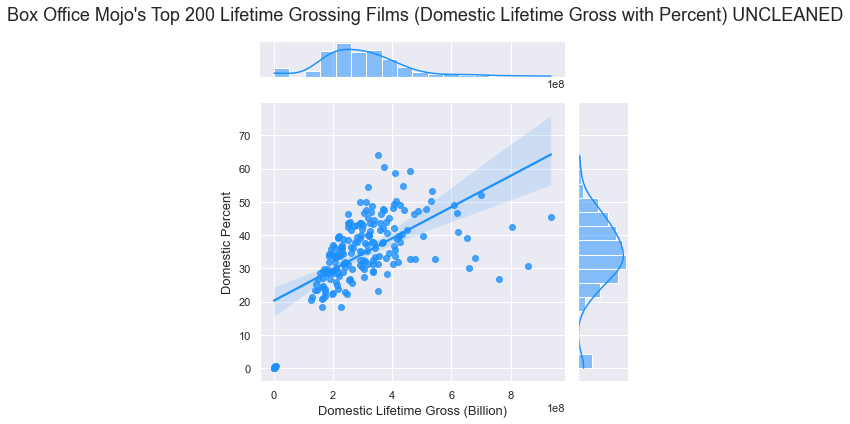

In [243]:
#define figure size
sns.set(rc={"figure.figsize":(10, 5)}) #width=8, height=4

#Create jointplot for Domestic Lifetime Gross and Domestic Percent, set color, and set as regression plot 
jp1 = sns.jointplot(data= df, x = "Domestic Lifetime Gross", y = "Domestic Percent", color = 'dodgerblue', kind = "reg")

#Set Title 
jp1.fig.suptitle("Box Office Mojo's Top 200 Lifetime Grossing Films (Domestic Lifetime Gross with Percent) UNCLEANED", fontsize = 18)

#Set titles for x and y axis and fontsize 
jp1.ax_joint.set_xlabel('Domestic Lifetime Gross (Billion)', fontsize = 13)
jp1.ax_joint.set_ylabel('Domestic Percent', fontsize =13)

#Tighten layout 
jp1.fig.tight_layout()

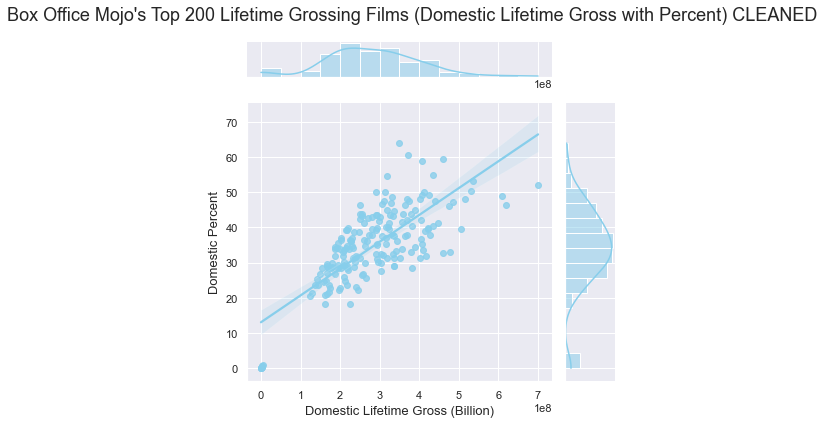

In [244]:
#define figure size
sns.set(rc={"figure.figsize":(10, 5)}) #width=8, height=4

#Create jointplot for Domestic Lifetime Gross and Domestic Percent, set color, and set as regression plot 
jp1 = sns.jointplot(data= new_df, x = "Domestic Lifetime Gross", y = "Domestic Percent", color = 'skyblue', kind = "reg")

#Set Title 
jp1.fig.suptitle("Box Office Mojo's Top 200 Lifetime Grossing Films (Domestic Lifetime Gross with Percent) CLEANED", fontsize = 18)

#Set titles for x and y axis and fontsize 
jp1.ax_joint.set_xlabel('Domestic Lifetime Gross (Billion)', fontsize = 13)
jp1.ax_joint.set_ylabel('Domestic Percent', fontsize =13)

#Tighten layout 
jp1.fig.tight_layout()

,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker
0,Domestic Percent,18.3,28.9,34.6,41.5,59.4


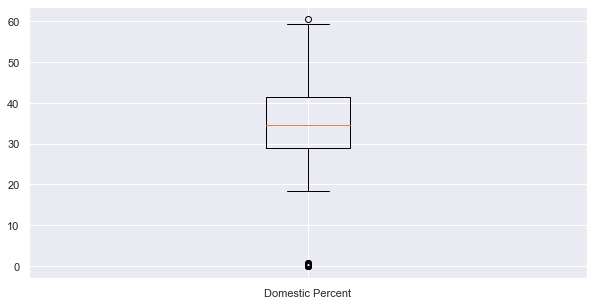

In [151]:
#Asssigned variables to columns
data1 = new_df["Domestic Percent"]

#Create Labels for columns 
labels = ['Domestic Percent']

#Create boxplot fore reference 
bp = plt.boxplot([data1], labels=labels)

#print results 
get_box_plot_data(labels, bp)

## Foreign Percent

**Find IQR of Domestic Percent column**

In [152]:
#Finding the IQR
percentile25 = df['Foreign Percent'].quantile(0.25)
percentile75 = df['Foreign Percent'].quantile(0.75)

#IQR
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#Finding Outliers
df[df['Foreign Percent'] > upper_limit]
df[df['Foreign Percent'] < lower_limit]

#Trimming
new_df = df[df['Foreign Percent'] < upper_limit]

new_df.shape

(190, 7)

**Visualizing Uncleaned and Cleaned Domestic Percentage column**

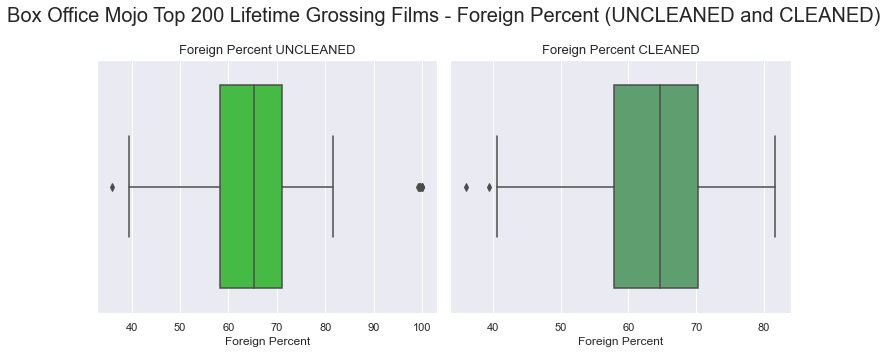

In [154]:
#Create function for subplots and figuresize 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create overall title
fig.suptitle('Box Office Mojo Top 200 Lifetime Grossing Films - Foreign Percent (UNCLEANED and CLEANED)', fontsize = 20)

#Create boxplot for "Domestic Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[0], x=df["Foreign Percent"], color = "limegreen")
axes[0].set_title("Foreign Percent UNCLEANED", fontsize = 13)

#Create boxplot for "Foreign Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[1], x=new_df["Foreign Percent"], color = "g")
axes[1].set_title("Foreign Percent CLEANED", fontsize = 13)

#Tighten layout
fig.tight_layout()

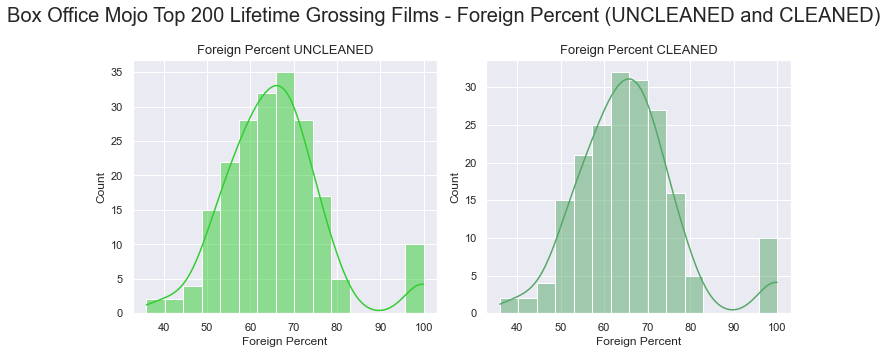

In [245]:
#Create function for subplots and figuresize 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create overall title
fig.suptitle('Box Office Mojo Top 200 Lifetime Grossing Films - Foreign Percent (UNCLEANED and CLEANED)', fontsize = 20)

#Create boxplot for "Domestic Percent", set color, title, and fontsize  
sns.histplot(ax=axes[0], x=df["Foreign Percent"], color = "limegreen", kde = True)
axes[0].set_title("Foreign Percent UNCLEANED", fontsize = 13)

#Create boxplot for "Foreign Percent", set color, title, and fontsize  
sns.histplot(ax=axes[1], x=new_df["Foreign Percent"], color = "g", kde = True)
axes[1].set_title("Foreign Percent CLEANED", fontsize = 13)

#Tighten layout
fig.tight_layout()

## There was a small difference in the UNCLEANED and CLEANED Foreign Percent data. It seems to have little effect. 

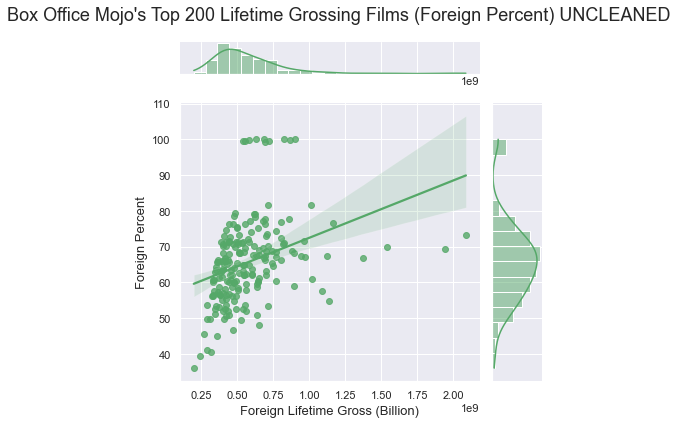

In [160]:
#define figure size
sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=5

#Create jointplot for Foreign Lifetime Gross and Foreign Percent, set color, and set as regression plot 
jp2 = sns.jointplot(data= df, x = "Foreign Lifetime Gross", y = "Foreign Percent", color = 'g', kind = "reg")

#Set Title 
jp2.fig.suptitle("Box Office Mojo's Top 200 Lifetime Grossing Films (Foreign Percent) UNCLEANED", fontsize = 18)

#Set titles for x and y axis and fontsize 
jp2.ax_joint.set_xlabel('Foreign Lifetime Gross (Billion)', fontsize = 13)
jp2.ax_joint.set_ylabel('Foreign Percent', fontsize =13)

#Tighten layout 
jp2.fig.tight_layout()

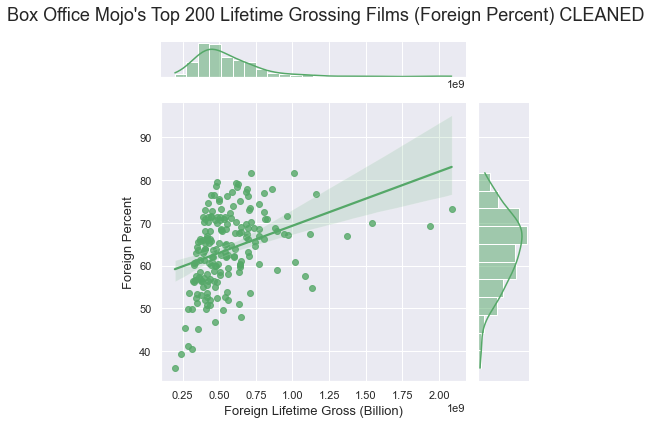

In [161]:
#define figure size
sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=5

#Create jointplot for Foreign Lifetime Gross and Foreign Percent, set color, and set as regression plot 
jp2 = sns.jointplot(data= new_df, x = "Foreign Lifetime Gross", y = "Foreign Percent", color = 'g', kind = "reg")

#Set Title 
jp2.fig.suptitle("Box Office Mojo's Top 200 Lifetime Grossing Films (Foreign Percent) CLEANED", fontsize = 18)

#Set titles for x and y axis and fontsize 
jp2.ax_joint.set_xlabel('Foreign Lifetime Gross (Billion)', fontsize = 13)
jp2.ax_joint.set_ylabel('Foreign Percent', fontsize =13)

#Tighten layout 
jp2.fig.tight_layout()

,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker
0,Foreign Percent,40.6,57.925,64.7,70.2,81.7


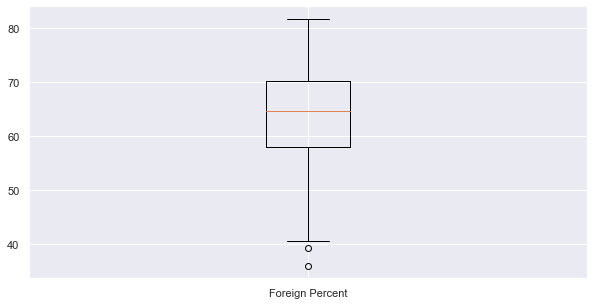

In [162]:
#Asssigned variables to columns
data1 = new_df["Foreign Percent"]

#Create Labels for columns 
labels = ['Foreign Percent']

#Create boxplot fore reference 
bp = plt.boxplot([data1], labels=labels)

#print results 
get_box_plot_data(labels, bp)

### Pie Charts of UNCLEANED and CLEANED Domestic and Foreign Lifetime Gross Percents

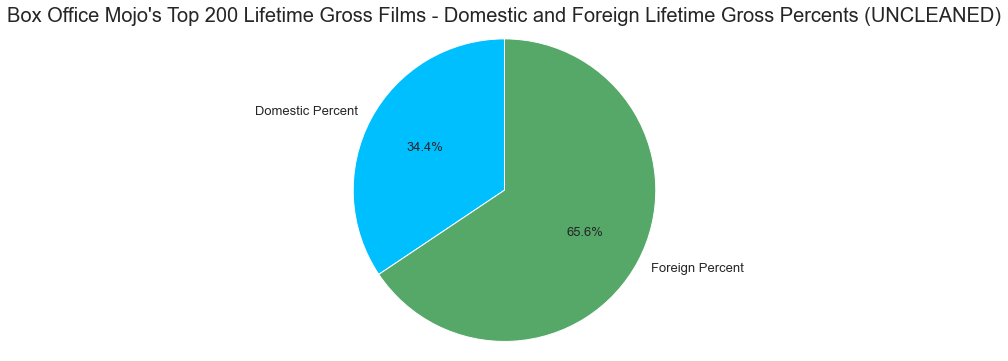

In [169]:
#Since we know the averages of Domestic and Foreign Percent
#let's create a pie chart 

#Create labels for piechart 
labels= ['Domestic Percent', 'Foreign Percent']

#Set the colors for piechart 
colors=['deepskyblue', 'g']

#Indicate the values for piechart 
sizes= [34.398000, 65.602000]

#Create piechart with sizes, labels, colors, and fontsize with appropriate float notations
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%',textprops={'fontsize': 13} )

#indicate that axis of piechart are symmetrical
plt.axis('equal')

#Create title for piechart
plt.title("Box Office Mojo's Top 200 Lifetime Gross Films - Domestic and Foreign Lifetime Gross Percents (UNCLEANED)", fontsize = 20)

#Set figuresize 
fig = plt.gcf()
fig.set_size_inches(6,6)

#show figure
plt.show()

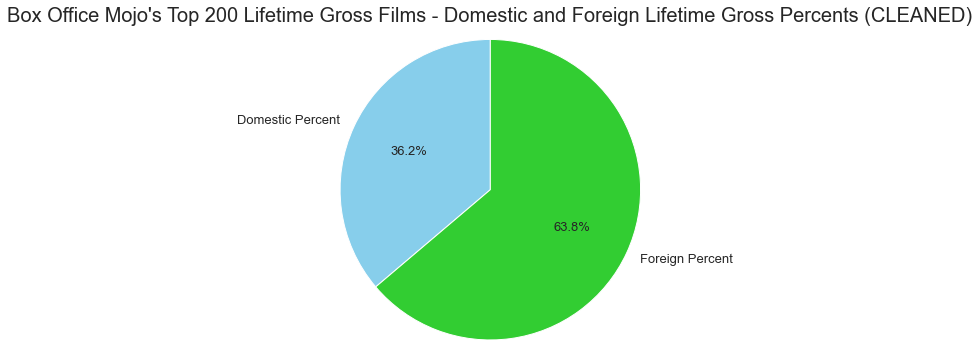

In [172]:
#Since we know the averages of Domestic and Foreign Percent
#let's create a pie chart 

#Create labels for piechart 
labels= ['Domestic Percent', 'Foreign Percent']

#Set the colors for piechart 
colors=['skyblue', 'limegreen']

#Indicate the values for piechart 
sizes= [36.19526315789474, 63.804736842105264 ]

#Create piechart with sizes, labels, colors, and fontsize with appropriate float notations
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%',textprops={'fontsize': 13} )

#indicate that axis of piechart are symmetrical
plt.axis('equal')

#Create title for piechart
plt.title("Box Office Mojo's Top 200 Lifetime Gross Films - Domestic and Foreign Lifetime Gross Percents (CLEANED)", fontsize = 20)

#Set figuresize 
fig = plt.gcf()
fig.set_size_inches(6,6)

#show figure
plt.show()

# 2. Describe the Domestic and Foreign Percentages and what we can infer.


Based on what was showned with the Domestic and Foreign Lifetime Grossings, the percentages were not far from a similar output. These are the results that were found in both cleaned and uncleaned columns. 

UNCLEANED         lower_whisker lower_quartile  median upper_quartile  upper_whisker
Domestic Percent  18.3          28.950          34.7   41.675          60.6
Foreign Percent   39.4          58.325          65.3   71.050          81.7

CLEANED
Domestic Percent  18.3          28.9            34.6   41.5            59.4
Foreign Percent   40.6          57.925          64.7   70.2            81.7

We can infer that foreign investment to these films contributed to its successful grossing incomes.  

### Let's see how the Global Lifetime Gross reflects the previous sections...

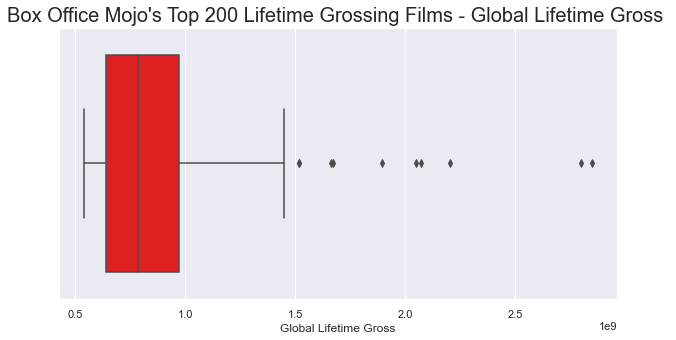

In [52]:
#Set figuresize
plt.figure(figsize=(10, 5))

#Set boxplot to Global Lifetime Gross and set color
glg = sns.boxplot(x=df["Global Lifetime Gross"], color = "red")

#Create title 
glg.set_title("Box Office Mojo's Top 200 Lifetime Grossing Films - Global Lifetime Gross ", fontsize = 20)

#display plot 
plt.show()

,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker
0,Global Lifetime Gross,542063846.0,6.413363e+08,787288788.5,972342099.5,1.450027e+09


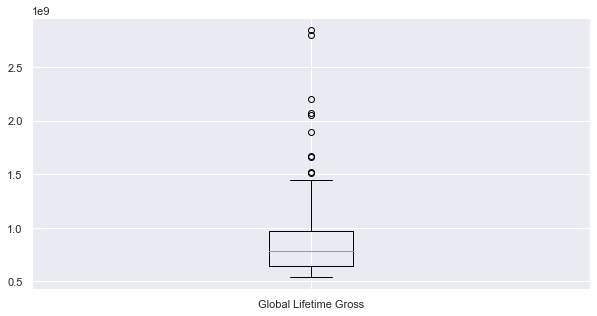

In [174]:
#Asssigned variables to columns
data1 = df["Global Lifetime Gross"]

#Create Labels for columns 
labels = ['Global Lifetime Gross']

#Create boxplot fore reference 
bp = plt.boxplot([data1], labels=labels)

#print results 
get_box_plot_data(labels, bp)

In [177]:
#Finding the IQR
percentile25 = df['Global Lifetime Gross'].quantile(0.25)
percentile75 = df['Global Lifetime Gross'].quantile(0.75)

#IQR
iqr = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#Finding Outliers
df[df['Global Lifetime Gross'] > upper_limit]
df[df['Global Lifetime Gross'] < lower_limit]

#Trimming
new_df = df[df['Global Lifetime Gross'] < upper_limit]

new_df.shape

(190, 7)

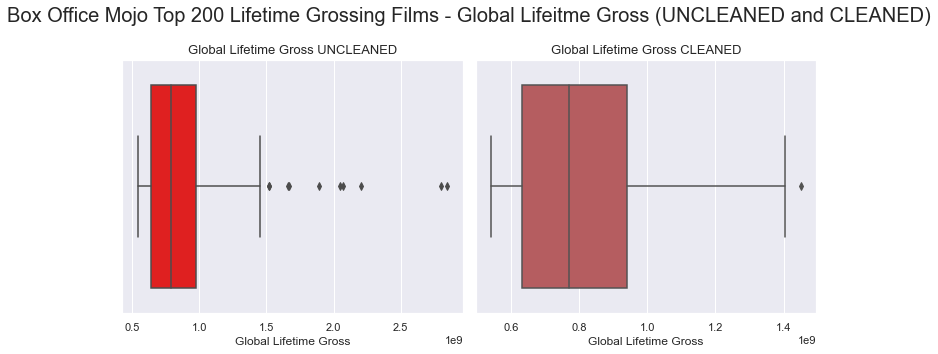

In [180]:
#Create function for subplots and figuresize 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create overall title
fig.suptitle('Box Office Mojo Top 200 Lifetime Grossing Films - Global Lifeitme Gross (UNCLEANED and CLEANED)', fontsize = 20)

#Create boxplot for "Domestic Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[0], x=df["Global Lifetime Gross"], color = "red")
axes[0].set_title("Global Lifetime Gross UNCLEANED", fontsize = 13)

#Create boxplot for "Foreign Percent", set color, title, and fontsize  
sns.boxplot(ax=axes[1], x=new_df["Global Lifetime Gross"], color = "r")
axes[1].set_title("Global Lifetime Gross CLEANED", fontsize = 13)

#Tighten layout
fig.tight_layout()

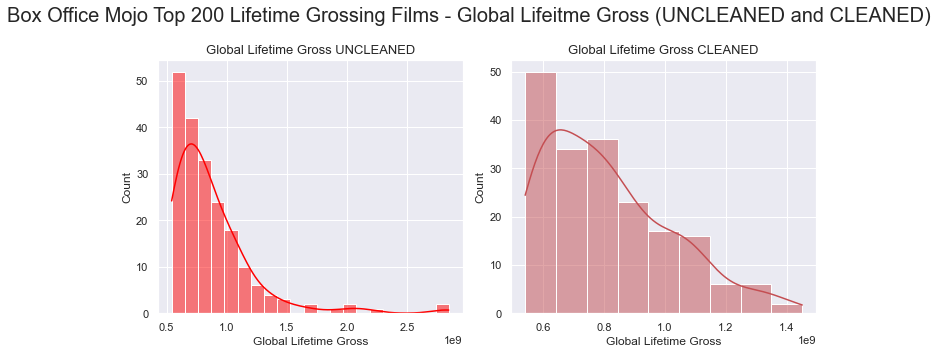

In [182]:
#Create function for subplots and figuresize 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Create overall title
fig.suptitle('Box Office Mojo Top 200 Lifetime Grossing Films - Global Lifeitme Gross (UNCLEANED and CLEANED)', fontsize = 20)

#Create boxplot for "Domestic Percent", set color, title, and fontsize  
sns.histplot(ax=axes[0], x=df["Global Lifetime Gross"], color = "red", kde = True)
axes[0].set_title("Global Lifetime Gross UNCLEANED", fontsize = 13)

#Create boxplot for "Foreign Percent", set color, title, and fontsize  
sns.histplot(ax=axes[1], x=new_df["Global Lifetime Gross"], color = "r", kde = True)
axes[1].set_title("Global Lifetime Gross CLEANED", fontsize = 13)

#Tighten layout
fig.tight_layout()

,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker
0,Global Lifetime Gross,542063846.0,631726089.0,771281882.5,9.417394e+08,1.402810e+09


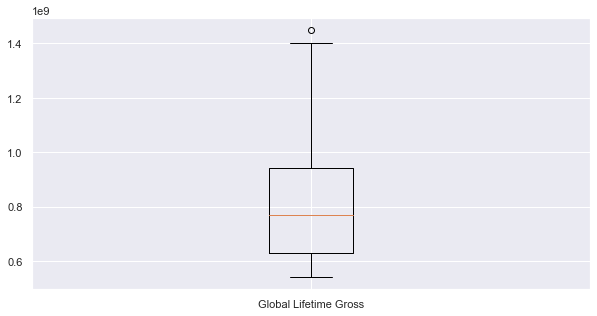

In [183]:
#Asssigned variables to columns
data1 = new_df["Global Lifetime Gross"]

#Create Labels for columns 
labels = ['Global Lifetime Gross']

#Create boxplot fore reference 
bp = plt.boxplot([data1], labels=labels)

#print results 
get_box_plot_data(labels, bp)

### 3. Describe what the Global Lifetime Gross is.

Once again, here is the summary description of the Global Lifetime Gross both cleaned and uncleaned. 

UNCLEANED             lower_whisker lower_quartile median      upper_quartile    upper_whisker
Global Lifetime Gross 542063846.0   6.413363e+08   787288788.5 972342099.5       1.450027e+09

CLEANED
Global Lifetime Gross 542063846.0   631726089.0    771281882.5 9.417394e+08      1.402810e+09

There is not a huge difference, but there is no denial that the outliers and foreign investments provided a large role in the financial successes in these films. 

### Let's see the year and the number of films per year

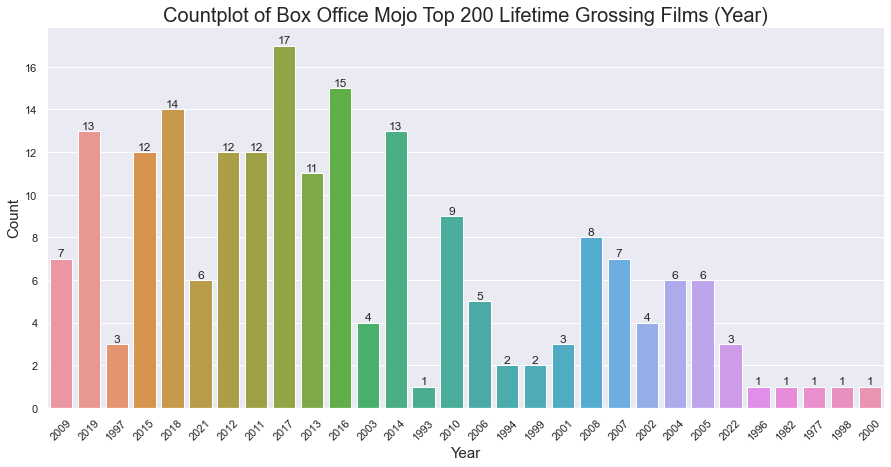

In [54]:
#Set figuresize 
plt.figure(figsize=(15,7))

#create countplot for "Year" column
cp = sns.countplot(data = df, x = "Year")

#Create title and fontsize
cp.set_title('Countplot of Box Office Mojo Top 200 Lifetime Grossing Films (Year)', fontsize = 20)

#Create title for x and y axis and set fontsizes
cp.set_xlabel("Year", fontsize = 15)
cp.set_ylabel("Count", fontsize = 15)

#indicate counts above bars
cp.bar_label(cp.containers[0])

#rotate x-ticks 
cp.set_xticklabels(cp.get_xticklabels(), rotation=45)

#display plot
plt.show()

In [55]:
#Find in all films shown in 2017 in "Year" column
df[df["Year"] == '2017']

,Title,Year,Foreign Percent,Domestic Percent,Foreign Lifetime Gross,Domestic Lifetime Gross,Global Lifetime Gross
14,Star Wars: Episode VIII - The Last Jedi,2017,53.5,46.5,712517448,620181382,1332698830
17,Beauty and the Beast,2017,60.4,39.6,769095055,504481165,1273576220
19,The Fate of the Furious,2017,81.7,18.3,1009996733,226008385,1236005118
41,Despicable Me 3,2017,74.4,25.6,770175831,264624300,1034800131
52,Jumanji: Welcome to the Jungle,2017,58.0,42.0,558002774,404540171,962542945
68,Spider-Man: Homecoming,2017,62.0,38.0,545965784,334201140,880166924
73,Wolf Warrior 2,2017,99.7,0.3,867604339,2721100,870325439
76,Guardians of the Galaxy Vol. 2,2017,54.9,45.1,473942950,389813101,863756051
79,Thor: Ragnarok,2017,63.1,36.9,538925590,315058289,853983879
84,Wonder Woman,2017,49.8,50.2,410009114,412845172,822854286


# 4. What year had the most counts in Box Office Mojo's chart? Describe the films.

2017 had the most counts in Box Office Mojo's Top 200 Lifetime Grossing Films chart. The films were: 

- Star Wars: Episode VIII - The Last Jedi (Lucas Film/Disney, Franchise) 

- Beauty and the Beast (Disney, Remake)

- The Fate of the Furious (Universal, Franchise)

- Despicable Me 3 (Universal, Franchise)

- Jumanji: Welcome to the Jungle (Universal, Remake/Franchise)

- Spider-Man: Homecoming (Marvel/Disney, Remake/Franchise)

- Wolf Warrior 2 (Kadokawa [China], Foreign Distribution, Franchise)

- Guardians of the Galaxy Vol. 2 (Marvel/Disney, Franchise)	

- Thor: Ragnarok (Marvel/Disney, Franchise)	

- Wonder Woman (DC/Warner Bros, Franchise)

- Coco (Pixar/Disney, Original)

- Pirates of the Caribbean: Dead Men Tell No Tales (Disney, Franchise)

- It (Universal, Franchise)	

- Justice League (DC/Warner Bros, Franchise)

- Logan	(20th Century Fox/Marvel, Franchise)

- Transformers: The Last Knight (Universal, Franchise)	

- Kong: Skull Island (Universal, Remake/Franchise)

The general description of these films are mostly the following: franchises (15), remakes (4), distributed or produced by Marvel(4), DC (2), Universal Studios (6), Warner Brothers (2), Disney(7), Pixar (1), and 20th Century Fox (1). Wolf Warrior 2 is our only foreign film produced by Kadokawa Future Publishing and Coco is our only original film from our countplot of 2017.

## Let's look at our Top 10 Lifetime Grossing Films

In [56]:
#show top ten films
top_10 = df.head(10)

#display result 
top_10

,Title,Year,Foreign Percent,Domestic Percent,Foreign Lifetime Gross,Domestic Lifetime Gross,Global Lifetime Gross
0,Avatar,2009,73.3,26.7,2086889714,760507625,2847397339
1,Avengers: Endgame,2019,69.3,30.7,1939128328,858373000,2797501328
2,Titanic,1997,70.0,30.0,1542283320,659363944,2201647264
3,Star Wars: Episode VII - The Force Awakens,2015,54.7,45.3,1132859475,936662225,2069521700
4,Avengers: Infinity War,2018,66.9,33.1,1369544272,678815482,2048359754
5,Spider-Man: No Way Home,2021,57.5,42.5,1088000000,804747988,1892747988
6,Jurassic World,2015,60.9,39.1,1018130819,653406625,1671537444
7,The Lion King,2019,67.3,32.7,1119261396,543638043,1662899439
8,The Avengers,2012,59.0,41.0,895457605,623357910,1518815515
9,Furious 7,2015,76.7,23.3,1162334379,353007020,1515341399


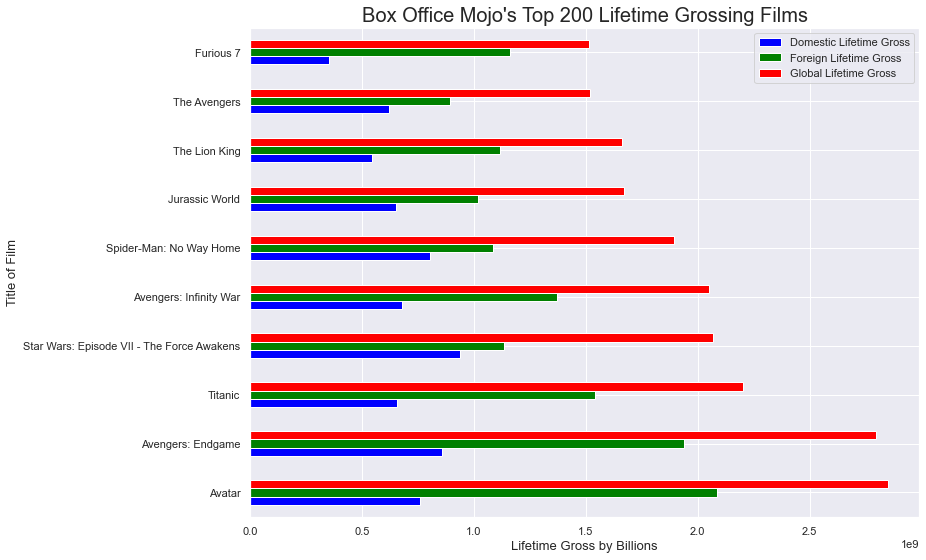

In [57]:
#Insert function for creating graph
fig, ax = plt.subplots(figsize=(12, 9))

#Plot horizontal bar graph for 'Domestic Lifetime Gross','Foreign Lifetime Gross',and 'Global Lifetime Gross'
#set colors 
top_10.plot.barh(x='Title',
                      y=['Domestic Lifetime Gross','Foreign Lifetime Gross', 'Global Lifetime Gross'],
                      ax=ax,
                      color=["Blue", "Green", "Red"])

#Create title for graph and set fontsize 
ax.set_title("Box Office Mojo's Top 200 Lifetime Grossing Films", fontsize = 20)

#Create x and y axis titles and fontsize 
ax.set_ylabel("Title of Film", fontsize = 13)
ax.set_xlabel("Lifetime Gross by Billions", fontsize = 13)

#Show graph
plt.show()

# 5. Describe the top 10 in Box Office Mojo's chart.

Our Top 10 Lifetime Grossing Films are: 

- Avatar (2009) - Dir. James Cameron, 20th Century Studios, *Franchise

- Avengers: Endgame	(2019) - Dir. Russo Brothers, Marvel/Disney, Franchise 

- Titanic (1997) - Dir. James Cameron, Paramount Studios, Original

- Star Wars: Episode VII - The Force Awakens (2015) - Dir. J.J. Abrams, Lucas Films/Disney, Franchise

- Avengers: Infinity War (2018): Dir. Russo Brothers, Marvel/Disney, Franchise

- Spider-Man: No Way Home (2021): Dir. Jon Watts, Marvel/Disney, Franchise

- Jurassic World (2015): Dir. Colin Trevorrow, Universal, Franchise

- The Lion King	(2019): Dir. Jon Favreau, Disney, Remake

- The Avengers (2012): Dir. Joss Whedon, Marvel/Disney, Franchise

- Furious 7	(2015): Dir. James Wan, Universal Studios, Franchise

(*) James Cameron announced this year that Avatar will receive three more sequels. Avatar: The Way of Water will be released in 2022, Avatar 3 will be set to be released in 2024, and Avatar 4 in 2026. 

The majority of the top 10 are: franchises with the exception of The Lion King which was a remake of the 1995 version of the film, 20th Century Studios, Disney, Marvel, Paramount, and Universal Studios. James Cameron and the Russo Brothers are the only directors that have two or more films in the top ten lifetime grossing films. There are 4 Marvel films all rooted within the same franchise yet six Disney films are reigned within the top 10. 




## Is there a relationship between the Domestic and Lifetime Gross?

The only way to tell is to do a regression plot to see if it is a possibility. 

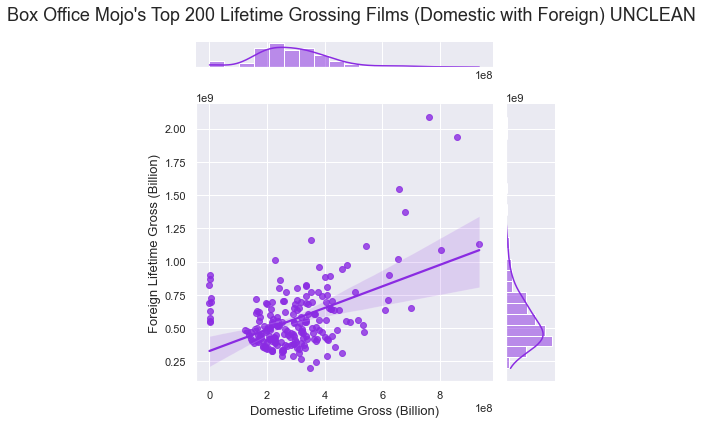

In [194]:
#define figure size
sns.set(rc={"figure.figsize":(10, 5)}) #width=8, height=4

#Create jointplot for Domestic and Foreign Lifetime Gross, set color, and create regression plots
jp3 = sns.jointplot(data= df, x = "Domestic Lifetime Gross", y = "Foreign Lifetime Gross", color = 'blueviolet', kind = "reg")

#Create title for graph
jp3.fig.suptitle("Box Office Mojo's Top 200 Lifetime Grossing Films (Domestic with Foreign) UNCLEAN", fontsize =18)

#Set titles for x and y axis and set fontsize 
jp3.ax_joint.set_xlabel('Domestic Lifetime Gross (Billion)', fontsize = 13)
jp3.ax_joint.set_ylabel('Foreign Lifetime Gross (Billion)', fontsize =13 )

#tighten layout 
jp3.fig.tight_layout()

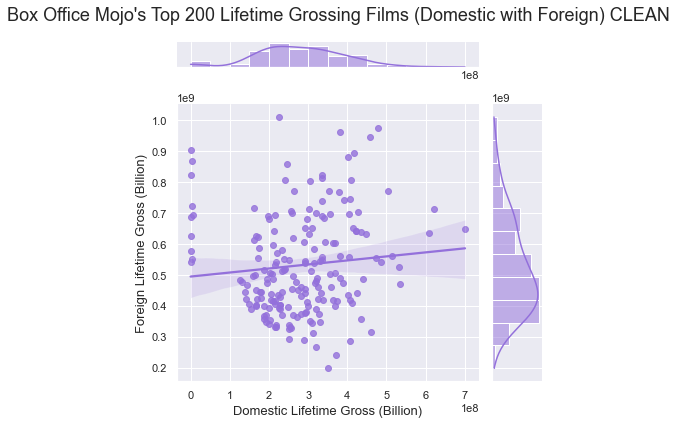

In [191]:
#define figure size
sns.set(rc={"figure.figsize":(10, 5)}) #width=8, height=4

#Create jointplot for Domestic and Foreign Lifetime Gross, set color, and create regression plots
jp3 = sns.jointplot(data= new_df, x = "Domestic Lifetime Gross", y = "Foreign Lifetime Gross", color = 'mediumpurple', kind = "reg")

#Create title for graph
jp3.fig.suptitle("Box Office Mojo's Top 200 Lifetime Grossing Films (Domestic with Foreign) CLEAN", fontsize =18)

#Set titles for x and y axis and set fontsize 
jp3.ax_joint.set_xlabel('Domestic Lifetime Gross (Billion)', fontsize = 13)
jp3.ax_joint.set_ylabel('Foreign Lifetime Gross (Billion)', fontsize =13 )

#tighten layout 
jp3.fig.tight_layout()

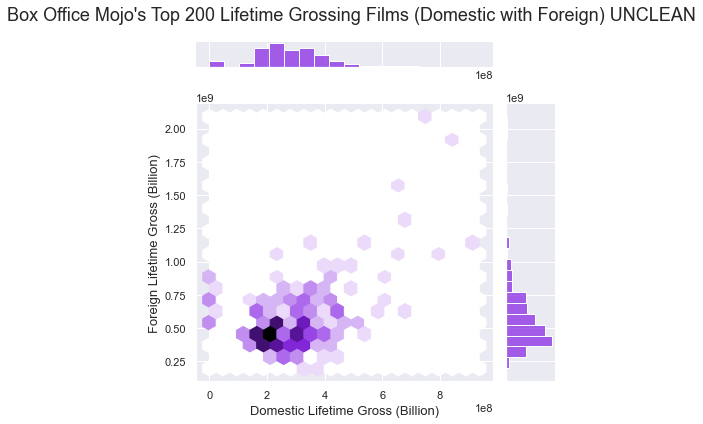

In [195]:
#define figure size
sns.set(rc={"figure.figsize":(10, 5)}) #width=8, height=4

#Create jointplot with Domestic and Foreign Lifetime Gross, set color, and set kind as hex 
jp3 = sns.jointplot(data= df, x = "Domestic Lifetime Gross", y = "Foreign Lifetime Gross", color = 'blueviolet', kind = "hex")

#Create title and set fontsize 
jp3.fig.suptitle("Box Office Mojo's Top 200 Lifetime Grossing Films (Domestic with Foreign) UNCLEAN", fontsize = 18)

#Create labels for x and y axis and set fontsize 
jp3.ax_joint.set_xlabel('Domestic Lifetime Gross (Billion)', fontsize = 13)
jp3.ax_joint.set_ylabel('Foreign Lifetime Gross (Billion)', fontsize =13)

#tighten layout
jp3.fig.tight_layout()

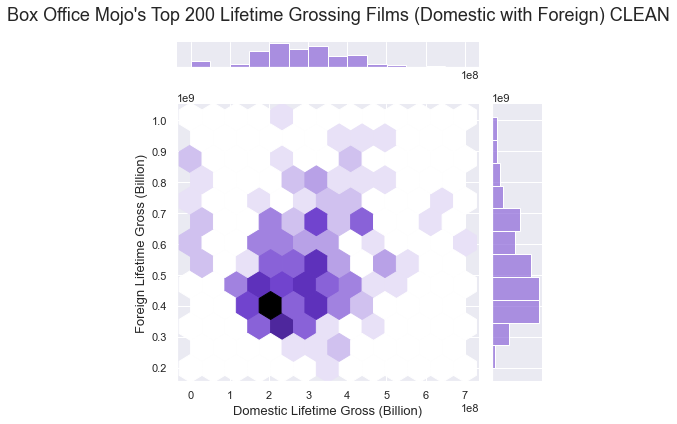

In [190]:
#define figure size
sns.set(rc={"figure.figsize":(10, 5)}) #width=8, height=4

#Create jointplot with Domestic and Foreign Lifetime Gross, set color, and set kind as hex 
jp3 = sns.jointplot(data= new_df, x = "Domestic Lifetime Gross", y = "Foreign Lifetime Gross", color = 'mediumpurple', kind = "hex")

#Create title and set fontsize 
jp3.fig.suptitle("Box Office Mojo's Top 200 Lifetime Grossing Films (Domestic with Foreign) CLEAN", fontsize = 18)

#Create labels for x and y axis and set fontsize 
jp3.ax_joint.set_xlabel('Domestic Lifetime Gross (Billion)', fontsize = 13)
jp3.ax_joint.set_ylabel('Foreign Lifetime Gross (Billion)', fontsize =13)

#tighten layout
jp3.fig.tight_layout()

### Notice how with the UNCLEAN regression jointplot, one can make the argument that it is positively correlated (despite having variance); whereas the CLEAN regression jointplot slightly neturalized the relationship (yet increased the variances even more). In comparision with our hexagonal jointplots, both UNCLEAN and CLEAN reinforces that there is a possibility that both Domestic and Foreign Lifetime Gross have a relationship. The questions becomes: who influences who?

# VI) Predictions 

## Lifetime Gross to Foreign Lifetime (UNCLEANED)

### Testing and Training Data: Domestic Lifetime Gross to Foreign Lifetime (UNCLEANED)

In [60]:
#Set variable X to Domestic Lifetime Gross
X = df[["Domestic Lifetime Gross"]]

In [61]:
#Set variable y to Foreign Lifetime Gross
y = df["Foreign Lifetime Gross"]

In [62]:
#grab the train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [63]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Train Model: Domestic Lifetime Gross to Foreign Lifetime (UNCLEANED)

In [64]:
# import the linearregression model
from sklearn.linear_model import LinearRegression

In [65]:
#Set LinearRegression() to lm
lm = LinearRegression()

In [66]:
#fit training sets 
lm.fit(X_train,y_train)

LinearRegression()

In [67]:
#print out coefficients
print(lm.coef_)

[0.6931513]


### Predicting Test Data: : Domestic Lifetime Gross to Foreign Lifetime (UNCLEANED)

In [68]:
#assign predicitions variable to x_test
predictions = lm.predict(X_test)

#Display results 
predictions

array([6.46788896e+08, 5.35362667e+08, 6.64371238e+08, 5.77429521e+08,
       4.89991092e+08, 3.56297337e+08, 5.68210942e+08, 6.17320816e+08,
       5.65433826e+08, 5.12484260e+08, 4.96775958e+08, 5.03727809e+08,
       4.83471810e+08, 5.32837289e+08, 4.68278375e+08, 5.26162041e+08,
       6.24433594e+08, 6.54589781e+08, 5.16127504e+08, 6.00192104e+08,
       4.70440567e+08, 5.12074863e+08, 5.30118036e+08, 5.03919507e+08,
       5.87002189e+08, 6.08860772e+08, 6.90812171e+08, 4.84062092e+08,
       5.55194830e+08, 8.10774745e+08, 8.39237355e+08, 6.36548913e+08,
       4.99616405e+08, 6.36599968e+08, 5.37160450e+08, 5.86272546e+08,
       4.98289419e+08, 4.83249996e+08, 5.70299341e+08, 3.54805685e+08,
       6.31656871e+08, 5.04898225e+08, 4.64332153e+08, 5.43723487e+08,
       5.56543060e+08, 7.75574997e+08, 5.01734323e+08, 7.24562758e+08,
       8.24257604e+08, 6.43278766e+08, 9.48718130e+08, 6.82667031e+08,
       6.73277486e+08, 4.69801157e+08, 5.98423047e+08, 3.53817076e+08,
      

Text(0.5, 1.0, 'Scatterplot of Real Test Values vs. Predicted Values for Domestic to Foreign Lifetime Gross (UNCLEANED)')

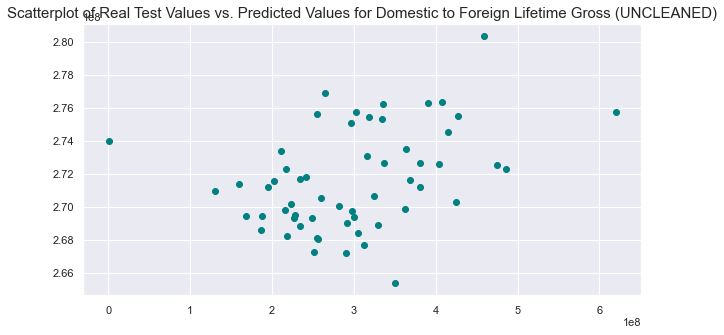

In [228]:
#Create scatterplot of real test values vs. predicted values for Domestic Lifetime Gross 
plt.scatter(y_test,predictions, color = 'teal')

#displaying the title
plt.title("Scatterplot of Real Test Values vs. Predicted Values for Domestic to Foreign Lifetime Gross (UNCLEANED)", 
         fontsize = 15)

In [70]:
#import metrics
from sklearn import metrics

#Print out Mean Absolute Error, Mean Squared Error, and Mean Squared Error
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RSME:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 170092446.71465248
MSE: 6.0037844358026776e+16
RSME: 245026211.57342896


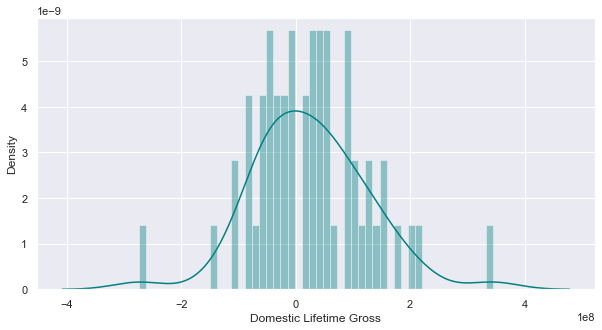

In [239]:
#Display distribution of predictions 
plot = sns.distplot((y_test-predictions), bins=50, color = 'teal')

In [72]:
#Put coefficients into a df
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])

#display result
coeff_df

,Coefficient
Domestic Lifetime Gross,0.693151


## Lifetime Gross to Foreign Lifetime (CLEANED)

### Testing and Training Data: Domestic Lifetime Gross to Foreign Lifetime (CLEANED)

In [200]:
#Set variable X to Domestic Lifetime Gross
X = new_df[["Domestic Lifetime Gross"]]

In [201]:
#Set variable y to Foreign Lifetime Gross
y = new_df["Foreign Lifetime Gross"]

In [202]:
#grab the train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [203]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Train Model: Domestic Lifetime Gross to Foreign Lifetime (CLEANED)

In [204]:
# import the linearregression model
from sklearn.linear_model import LinearRegression

In [205]:
#fit training sets 
lm.fit(X_train,y_train)

LinearRegression()

In [206]:
#print out coefficients
print(lm.coef_)

[0.03377333]


### Predicting Test Data: Domesitc Lifetime Gross to Foreign Lifetime Gross (CLEANED)

In [207]:
#assign predicitions variable to x_test
predictions = lm.predict(X_test)

#display results 
predictions

array([5.43593846e+08, 5.35127730e+08, 5.38631809e+08, 5.39668744e+08,
       5.42993608e+08, 5.42018247e+08, 5.38078420e+08, 5.43025031e+08,
       5.38884733e+08, 5.40789747e+08, 5.44747598e+08, 5.42061698e+08,
       5.40965855e+08, 5.36120234e+08, 5.43173066e+08, 5.39325607e+08,
       5.38018825e+08, 5.40881459e+08, 5.40561077e+08, 5.39132854e+08,
       5.44513868e+08, 5.39227451e+08, 5.41694044e+08, 5.47155322e+08,
       5.40741058e+08, 5.42097250e+08, 5.38643928e+08, 5.39504683e+08,
       5.38373630e+08, 5.38247006e+08, 5.38096789e+08, 5.38430005e+08,
       5.41283415e+08, 5.40547457e+08, 5.45146966e+08, 5.37839436e+08,
       5.42557537e+08, 5.39390746e+08, 5.37041993e+08, 5.37318731e+08,
       5.45073955e+08, 5.44394170e+08, 5.51677092e+08, 5.43921070e+08,
       5.46233658e+08, 5.39348369e+08, 5.37052801e+08, 5.41838704e+08,
       5.30735461e+08, 5.41501375e+08, 5.43574505e+08, 5.46758455e+08,
       5.37582553e+08, 5.41046346e+08, 5.36407203e+08, 5.40231504e+08,
      

Text(0.5, 1.0, 'Scatterplot of Real Test Values vs. Predicted Values for Domestic to Foreign Lifetime Gross (CLEANED)')

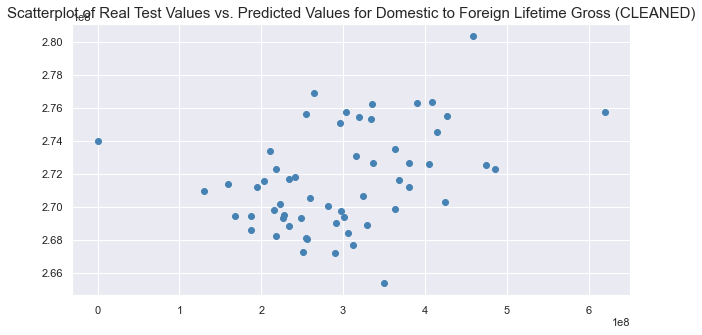

In [230]:
#Create scatterplot of real test values vs. predicted values for Domestic Lifetime Gross 
plt.scatter(y_test,predictions, color = 'steelblue')

#displaying the title
plt.title("Scatterplot of Real Test Values vs. Predicted Values for Domestic to Foreign Lifetime Gross (CLEANED)", 
         fontsize = 15)

In [209]:
#import metrics
from sklearn import metrics

#Print out Mean Absolute Error, Mean Squared Error, and Mean Squared Error
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RSME:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 128711007.68949695
MSE: 2.3467798037772228e+16
RSME: 153192029.9420705


<AxesSubplot:xlabel='Domestic Lifetime Gross', ylabel='Density'>

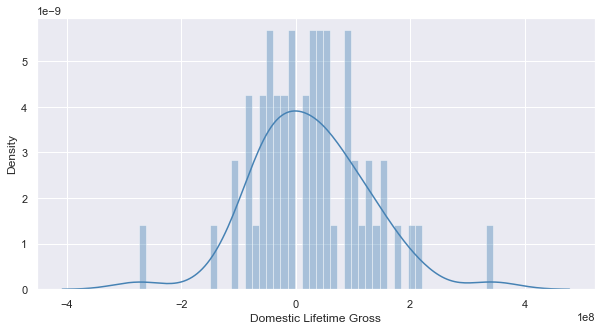

In [240]:
#Display distribution of predictions 
sns.distplot((y_test-predictions), bins=50, color = 'steelblue')

In [211]:
#Put coefficients into a df
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])

#display results 
coeff_df

,Coefficient
Domestic Lifetime Gross,0.033773


## Foreign Lifetime Gross to Domestic Lifetime Gross (UNCLEANED)

### Testing and Training Data: Foreign Lifetime Gross to Domestic Lifetime Gross (UNCLEANED)

In [73]:
#Set variable X to Foreign Lifetime Gross
X = df[["Foreign Lifetime Gross"]]

In [74]:
#Set variable y to Domestic Lifetime Gross
y = df["Domestic Lifetime Gross"]

In [75]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Train Model: Foreign Lifetime Gross to Domestic Lifetime Gross (UNCLEANED)

In [76]:
#Set LinearRegression() to lm
lm = LinearRegression()

In [77]:
#fit training sets 
lm.fit(X_train,y_train)

LinearRegression()

In [78]:
#print out coefficients
print(lm.coef_)

[0.26924566]


### Predicting Test Data: Foreign Lifetime Gross to Domestic Lifetime Gross (UNCLEANED)

In [79]:
#assign predicitions variable to x_test
predictions = lm.predict(X_test)

#display results 
predictions

array([3.13459689e+08, 2.74438447e+08, 3.11352973e+08, 2.73024217e+08,
       3.26729484e+08, 3.35467968e+08, 3.16353552e+08, 2.72343711e+08,
       2.34845899e+08, 2.56399713e+08, 2.58962476e+08, 2.83762368e+08,
       2.48635978e+08, 3.29563980e+08, 2.75661689e+08, 2.47247827e+08,
       3.40537155e+08, 3.13063510e+08, 2.40430772e+08, 3.28081535e+08,
       2.54329042e+08, 2.49206670e+08, 2.30389857e+08, 3.27814048e+08,
       2.91280590e+08, 3.03194050e+08, 2.86924817e+08, 2.79233494e+08,
       2.18749151e+08, 5.56172612e+08, 3.15167617e+08, 2.18027182e+08,
       3.01755539e+08, 3.41575699e+08, 3.48286024e+08, 3.39883470e+08,
       2.76107495e+08, 2.37040225e+08, 2.24789548e+08, 2.96486134e+08,
       3.78005160e+08, 2.32147050e+08, 2.74276900e+08, 2.61837750e+08,
       2.87459375e+08, 3.11757915e+08, 3.13928612e+08, 2.67765248e+08,
       5.09663374e+08, 3.81287654e+08, 6.63021408e+08, 2.89687991e+08,
       2.25570226e+08, 2.61826160e+08, 4.53873010e+08, 3.09545250e+08,
      

Text(0.5, 1.0, 'Scatterplot of Real Test Values vs. Predicted Values for Foreign to Domestic Lifetime Gross (UNCLEANED)')

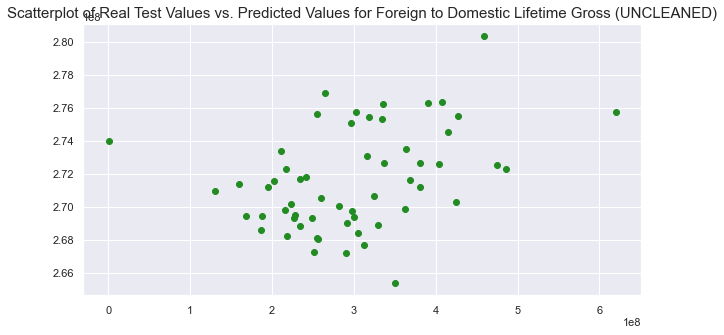

In [234]:
#Create scatterplot of real test values vs. predicted values for Domestic Lifetime Gross 
plt.scatter(y_test,predictions, color = 'forestgreen')

#displaying the title
plt.title("Scatterplot of Real Test Values vs. Predicted Values for Foreign to Domestic Lifetime Gross (UNCLEANED)", 
         fontsize = 15)

In [81]:
#import metrics
from sklearn import metrics

#Print out Mean Absolute Error, Mean Squared Error, and Mean Squared Error
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RSME:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 104217451.3601678
MSE: 1.9036795650577404e+16
RSME: 137973894.81556794


<AxesSubplot:xlabel='Domestic Lifetime Gross', ylabel='Density'>

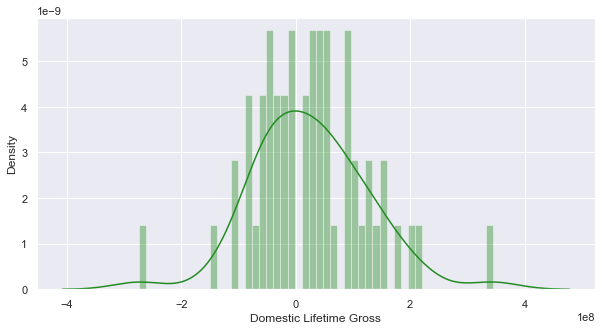

In [241]:
#Display distribution of predictions 
sns.distplot((y_test-predictions), bins=50, color = 'forestgreen')

In [83]:
#Put coefficients into a df
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])

#display results 
coeff_df

,Coefficient
Foreign Lifetime Gross,0.269246


## Foreign Lifetime Gross to Domestic Lifetime Gross (CLEANED)

### Testing and Training Data: Foreign Lifetime Gross to Domestic Lifetime (CLEANED)

In [212]:
#Set variable X to Foreign Lifetime Gross
X = new_df[["Foreign Lifetime Gross"]]

In [213]:
#Set variable y to Domestic Lifetime Gross
y = new_df["Domestic Lifetime Gross"]

In [214]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Train Model: Foreign Lifetime Gross to Domestic Lifetime Gross (CLEANED)

In [215]:
#Set LinearRegression() to lm
lm = LinearRegression()

In [216]:
#fit training sets 
lm.fit(X_train,y_train)

LinearRegression()

In [217]:
#print out coefficients
print(lm.coef_)

[0.0200653]


### Predicting Test Data: Foreign Lifetime Gross to Domestic Lifetime Gross (CLEANED)

In [218]:
#assign predicitions variable to x_test
predictions = lm.predict(X_test)

#display results 
predictions

array([2.72637654e+08, 2.70947094e+08, 2.71686855e+08, 2.76864740e+08,
       2.69833662e+08, 2.75281613e+08, 2.72295770e+08, 2.73501353e+08,
       2.71784718e+08, 2.69702097e+08, 2.74492822e+08, 2.76238546e+08,
       2.75737555e+08, 2.71349273e+08, 2.71585528e+08, 2.68078629e+08,
       2.69764347e+08, 2.69396109e+08, 2.68975548e+08, 2.69334955e+08,
       2.76364658e+08, 2.67261971e+08, 2.70667151e+08, 2.72291848e+08,
       2.75069295e+08, 2.72616459e+08, 2.68826920e+08, 2.70533718e+08,
       2.69294644e+08, 2.70146195e+08, 2.68209582e+08, 2.69467091e+08,
       2.67661271e+08, 2.67211115e+08, 2.75489410e+08, 2.73397095e+08,
       2.65369813e+08, 2.68012755e+08, 2.68574242e+08, 2.71196260e+08,
       2.70246558e+08, 2.72607423e+08, 2.75707807e+08, 2.76287262e+08,
       2.80348635e+08, 2.75598363e+08, 2.69438405e+08, 2.68894636e+08,
       2.73977617e+08, 2.75434606e+08, 2.71205204e+08, 2.72497771e+08,
       2.71566548e+08, 2.68410712e+08, 2.69408958e+08, 2.70057443e+08,
      

Text(0.5, 1.0, 'Scatterplot of Real Test Values vs. Predicted Values for Foreign to Domestic Lifetime Gross (CLEANED)')

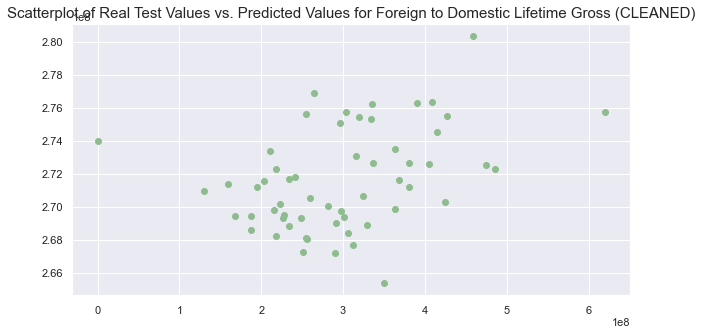

In [236]:
#Create scatterplot of real test values vs. predicted values for Domestic Lifetime Gross 
plt.scatter(y_test,predictions, color = 'darkseagreen')

#displaying the title
plt.title("Scatterplot of Real Test Values vs. Predicted Values for Foreign to Domestic Lifetime Gross (CLEANED)", 
         fontsize = 15)

<AxesSubplot:xlabel='Domestic Lifetime Gross', ylabel='Density'>

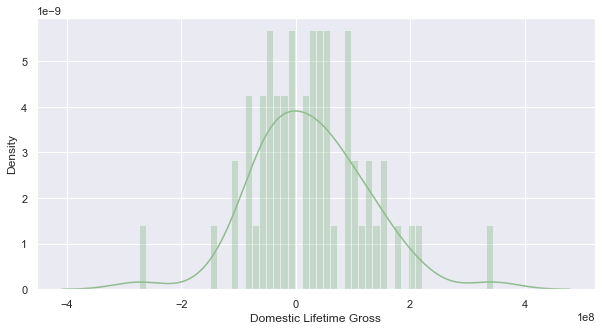

In [242]:
#Display distribution of predictions 
sns.distplot((y_test-predictions), bins=50, color = 'darkseagreen')

In [221]:
#Put coefficients into a df
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])

#display results 
coeff_df

,Coefficient
Foreign Lifetime Gross,0.020065


### 6. Based on what is shown for the Domestic and Foreign Lifetime Gross incomes, what is the relationship between both variables?

We have determined that there is some sort of relationship between Domestic and Foreign Lifetime Gross incomes. It was unclear as far as who and where the relationship was established. Here is what the Prediction Tests resulted in for both UNCLEANED AND CLEANED data:

UNCLEANED               COEFFICIENTS
Domestic Lifetime Gross	0.693151
Foreign Lifetime Gross	0.269246

CLEANED 
Domestic Lifetime Gross	0.033773
Foreign Lifetime Gross	0.020065

The coefficients are estimates of some unknown parameters to describe the relationship between a predictor variable and the corresponding response. As a whole, both UNCLEAN and CLEAN data of the Domestic and Foreign Lifetime Grosses indicate that there is a definate positive relationship between the two. We can say that examining both sets of coefficients suggest that the Domestic Lifetime Gross (as our independent variable) effects how our Foreign Lifetime Gross responds (as our dependent variable). This was unexpected to some extent considering that from our previous visualizations, it was clear that the Foreign Lifetime Gross contributed the most to the overall financial successes to these films and by first impression, one would expect that the Foreign Lifetime Gross would have a larger impact in the relationship.

The intriguing component of this relationship is the large differences of the coefficient amounts. The UNCLEANED data (the inclusion of the outliers) states that the Domestic Lifetime Gross has a 69% correlation with how the Foreign Lifetime Gross will respond; whereas vice versa indicates the complete opposite. The CLEANED data (the exclusion of outliers) indicates that while the Domestic Lifetime Gross as a 3% correlation with how the Foreign Lifetime Gross will respond, it is not a large difference with the opposite relationship at 2% which is relatively lower than expected. 

By taking into account of what was elaborated, we can say that the outliers do have a great impact on how both domestic and foreign lifetime grosses will perform. It does suggest that there is a larger context and other variables that are contributing to this response. The data that Box Office Mojo provided does not take into account. 

# VII) Conclusions - In-Depth Responses

**1. Describe what the Domestic and Foreign Gross incomes are.** 

Overall, it is clear that the data is for the most part skewed to left and 10 outliers are responsbile for it.(These outliers will be reflected in the top 10 list further in this project). The nature of this data is non-symmetrical as suspsected and reinforced by the removal of the outliers.  

In short summary of what was found from the uncleaned and cleaned Domestic and Foreign Lifetime Grosses, the results follows (in hundred billions): 

UNCLEANED               lower_whisker	lower_quartile	  median	    upper_quartile	upper_whisker
Domestic Lifteime Gross	0.0	            209727732.0	      290843887.0	3.681451e+08	5.436380e+08
Foreign Lifetime Gross	197300000.0	    416072657.0	      509152962.0	6.591262e+08	1.018131e+09                        
                        
CLEANED                 lower_whisker	lower_quartile	  median	    upper_quartile	upper_whisker
Domestic Lifteime Gross	0.0	            206445654.0	      274092705.0	350159020.0	    543638043.0
Foreign Lifteime Gross	197300000.0	    412409199.5	      501184763.0	6.412634e+08	972653355.0

Notice how the outliers dictate the nature of the data. With the outliers in the picture, the upper whiskers of the Uncleaned Domestic Lifetime Gross is 5.4 hundred billion dollars whereas the Foreign Lifetime Gross is an estimated 1.02 hundred billion dollars. This implies that the outliers gives a competitive edge than the foreign market does. HOWEVER, without the outliers, the Foreign Lifetime Gross is largely responsible for the overall gross incomes of these films. 

**2. Describe the Domestic and Foreign Percentages and what we can infer.**

Based on what was showned with the Domestic and Foreign Lifetime Grossings, the percentages were not far from a similar output. These are the results that were found in both cleaned and uncleaned columns: 

UNCLEANED         lower_whisker lower_quartile  median upper_quartile  upper_whisker
Domestic Percent  18.3          28.950          34.7   41.675          60.6
Foreign Percent   39.4          58.325          65.3   71.050          81.7

CLEANED
Domestic Percent  18.3          28.9            34.6   41.5            59.4
Foreign Percent   40.6          57.925          64.7   70.2            81.7

We can infer and be certian that foreign investment to these films contributed to its successful grossing incomes. Regardless of the outliers, foreign incomes played a huge role into the grossing incomes. 

**3. Describe what the Global Lifetime Gross is.**

Now considering the overall picture, here is the summary description of the Global Lifetime Gross both cleaned and uncleaned. 

UNCLEANED             lower_whisker lower_quartile median      upper_quartile    upper_whisker
Global Lifetime Gross 542063846.0   6.413363e+08   787288788.5 972342099.5       1.450027e+09

CLEANED
Global Lifetime Gross 542063846.0   631726089.0    771281882.5 9.417394e+08      1.402810e+09

There is not a huge difference, but there is no denial that the outliers and foreign investments provided a large role in the financial successes in these films. 

**4. What year had the most counts in Box Office Mojo's chart? Describe the films.**

2017 had the most counts in Box Office Mojo's Top 200 Lifetime Grossing Films chart. The films were: 

- Star Wars: Episode VIII - The Last Jedi (Lucas Film/Disney, Franchise) 

- Beauty and the Beast (Disney, Remake)

- The Fate of the Furious (Universal, Franchise)

- Despicable Me 3 (Universal, Franchise)

- Jumanji: Welcome to the Jungle (Universal, Remake/Franchise)

- Spider-Man: Homecoming (Marvel/Disney, Remake/Franchise)

- Wolf Warrior 2 (Kadokawa [China], Foreign Distribution, Franchise)

- Guardians of the Galaxy Vol. 2 (Marvel/Disney, Franchise)	

- Thor: Ragnarok (Marvel/Disney, Franchise)	

- Wonder Woman (DC/Warner Bros, Franchise)

- Coco (Pixar/Disney, Original)

- Pirates of the Caribbean: Dead Men Tell No Tales (Disney, Franchise)

- It (Universal, Franchise)	

- Justice League (DC/Warner Bros, Franchise)

- Logan	(20th Century Fox/Marvel, Franchise)

- Transformers: The Last Knight (Universal, Franchise)	

- Kong: Skull Island (Universal, Remake/Franchise)

The general description of these films are mostly the following: franchises (15), remakes (4), distributed or produced by Marvel(4), DC (2), Universal Studios (6), Warner Brothers (2), Disney(7), Pixar (1), and 20th Century Fox (1). Wolf Warrior 2 is our only foreign film produced by Kadokawa Future Publishing and Coco is our only original film from our countplot of 2017.

It is important to recall that in 2009, Disney brought Marvel Entertainment which led to the creation of Marvel Studios and Marvel TV. On top of this, in 2019, Disney acquired 20th Century Studios (one of the original "Big Six" American film studios since 1935). Due to this acquisition, Disney dominates the media market by 28% (that over a fourth of the world's media). It is not suprising to see Disney appear as much as it did in this dataset.  Let alone, see that more and more films are dependent on franchises and/or remakes which is suggestive of an already established audience, familiarity to style and story, and repetition of both. 

**5. Describe the top 10 in Box Office Mojo's chart.**

Our Top 10 Lifetime Grossing Films are: 

- Avatar (2009) - Dir. James Cameron, 20th Century Studios, *Franchise

- Avengers: Endgame	(2019) - Dir. Russo Brothers, Marvel/Disney, Franchise 

- Titanic (1997) - Dir. James Cameron, Paramount Studios, Original

- Star Wars: Episode VII - The Force Awakens (2015) - Dir. J.J. Abrams, Lucas Films/Disney, Franchise

- Avengers: Infinity War (2018): Dir. Russo Brothers, Marvel/Disney, Franchise

- Spider-Man: No Way Home (2021): Dir. Jon Watts, Marvel/Disney, Franchise

- Jurassic World (2015): Dir. Colin Trevorrow, Universal, Franchise

- The Lion King	(2019): Dir. Jon Favreau, Disney, Remake

- The Avengers (2012): Dir. Joss Whedon, Marvel/Disney, Franchise

- Furious 7	(2015): Dir. James Wan, Universal Studios, Franchise

**(*) James Cameron announced this year that Avatar will receive three more sequels. Avatar: The Way of Water will be released in December 2022, Avatar 3 in 2024, and Avatar 4 in 2026.** 

The majority of the top 10 are: franchises with the exception of The Lion King, 20th Century Studios, Disney, Marvel, Paramount, and Universal Studios. James Cameron and the Russo Brothers are the only directors that have two or more films in the top ten lifetime grossing films. But Avatar and Avengers: Endgame are by a slight margin off from each other. There are 4 Marvel films all rooted within the same franchise yet six Disney films are reigned within the top 10. Titanic is the only film that is an originalnwithin the top 10. 

From a film studies standpoint, we can see why these films were so successful: 

- **Avatar**: a 12 year pursuit as the first of its kind film where it utilized motion capture ("mo-cap") technology that trnasfers that movement to animation all computer generated (as similar to video game visuals). It proved the potential of incoporating technology into films into the film market while raising the popularity of 3D and IMAX experiences. On top of this, the narrative covered topics regarding race relations, destruction of natural habitats, and greed while being critical of colonialism. 

- **The Avengers - Original, Infiinity War and Endgame***: a true movie experience where there was a communial component active in the success of the Marvel franchise. By slowly progressing and introducing the lore of the Marvel universe to audiences, Disney/Marvel created a following where viewers are motivated to see beloved characters of the 20th century come to life on the big screen and create a cultural experience where the anticipation of seeing these films unravel as one would anticipate the next issue of a comic book series. What is interesting about these three films is that for the first time on a larger scale, did the telling of the superhero lore challenged audiences to witness the union of these characters to the death of beloved characters, the failure of the defeating the villian, the reunion and redemption of the fallen heros, and now, the passing of the baton to a new generation of superheros that are not too familar with an established fan based. It essentially created an emotional experience for audiences to realize how multi-generational the franchise was and still is today. 

- **Titanic**: based on a true tragic event, this film is arguably less commerical than its counterparts. The film tries to tell a preceived-to-be-true and tragic love story while providing technological advancements of not only illustrating a large-scale event with minimal technology advancements, but it attempted to provide an illustrative answer to how the tragedy unraveled. At the time, there was not an answer to how the Titanic sank (and fascinately, it was not far off from the truth). Not to mention, it was accompanied with an excellent music composition that is arguably one of the most successful scores of all time. 

- **Star Wars - Episode VII**:The original Star Wars trilogy changed cinema since 1977 and is considered the franchise that shaped the current franchise-trend of present day filmmaking. There is no denial that this film was critical in film history and the grossing incomes internationally proved it. Naturally, there was the creation of prequel films to expand the Star Wars lore. Those films were arguably disasterous. Since 2005, Star Wars Episode VII is the continuation of the original Star Wars films and brought back the original cast with a new one. As expected, audiences were anticipating the revival of a beloved franchise and were craving the story to continue. 

- **Spiderman - No Way Home**: Spiderman is Marvel's most beloved character. It goes without saying that Spiderman has had big screen time. In matter of fact, three times within the last 20 years. Like The Avengers, this brought audiences rushing to the theathers: it brought together all three Spidermans in one film (and with the original casts per film). This was Marvel's formal introduction to the Multi-verse, the idea of colliding multiple interpretations of a story into one story. This will be critical in the upcoming Marvel films. Needless to say, this was one of Marvel's most anticipated films within its franchise. 

- **Jurassic World**: Continuing Steven Spielberg's Jurassic Park (1995), Jurassic World continues the story. With anticipation of capturing Speilberg's magic of using puppetry and animation of real-life sized dinosaurs, this film, for the most part, stayed loyal to the original while incoporating new ideas to establish its own identity. 

- **The Lion King**: The original Lion King was the Magnum Opus of the Disney Renaissance, a period where Disney Animation films revived itself after a dark period of no success and reimagined its branding and story-telling. Combined with a astounding musical composition and the first African-story told by Disney, The Lion King cemented itself as one of the greatest animated films of all time. Retelling this story and match its original magic is a challenge, but what lacked in the original film was an all-black cast for an African story. This drew audiences to see and give this film a chance recapture their imagination again. Not to mention, the audiences that came to see this new film were children when the original premiered. 

- **Furious 7** - an original and self-made on-going franchise revolving around street racing, under-ground crime making, and famial bonding. The Fast and the Furious franchise faced a huge disruption in the production of this film: one of its main actors, Paul Walker, tragically died in a car accident. Beloved as he was, this was Walker's last film and the film commmerated his legacy. Audiences and fans alike came to see and pay their respect to an icon through watching that film.   


**6. Based on what is shown for the Domestic and Foreign Gross incomes, what is the relationship between both variables?** 

We have determined that there is some sort of relationship between Domestic and Foreign Lifetime Gross incomes. It was unclear as far as who and where the relationship was established. Here is what the Prediction Tests resulted in for both UNCLEANED AND CLEANED data:

UNCLEANED               COEFFICIENTS
Domestic Lifetime Gross	0.693151
Foreign Lifetime Gross	0.269246

CLEANED 
Domestic Lifetime Gross	0.033773
Foreign Lifetime Gross	0.020065

The coefficients are estimates of some unknown parameters to describe the relationship between a predictor variable and the corresponding response. As a whole, both UNCLEAN and CLEAN data of the Domestic and Foreign Lifetime Grosses indicate that there is a definate positive relationship between the two. We can say that examining both sets of coefficients suggest that the Domestic Lifetime Gross (as our independent variable) effects how our Foreign Lifetime Gross responds (as our dependent variable). This was unexpected to some extent considering that from our previous visualizations, it was clear that the Foreign Lifetime Gross contributed the most to the overall financial successes to these films and by first impression, one would expect that the Foreign Lifetime Gross would have a larger impact in the relationship.

The intriguing component of this relationship is the large differences of the coefficient amounts. The UNCLEANED data (the inclusion of the outliers) states that the Domestic Lifetime Gross has a 69% correlation with how the Foreign Lifetime Gross will respond; whereas vice versa indicates the complete opposite. The CLEANED data (the exclusion of outliers) indicates that while the Domestic Lifetime Gross as a 3% correlation with how the Foreign Lifetime Gross will respond, it is not a large difference with the opposite relationship at 2% which is relatively lower than expected. 

By taking into account of what was elaborated, we can say that the outliers do have a great impact on how both domestic and foreign lifetime grosses will perform. It does suggest that there is a larger context and other variables that are contributing to this response. The data that Box Office Mojo provided does not take into account. 

**7. Based on the relationship of the Domestic and Foreign Gross incomes, what is some information that was not addressed in the data that could potentially answer the relationships and/or the highlights of the visualization and prediction porition of this project?**

According to Lash and Zhao's research study, they measured a film's profitibility by the following: Star Power, Network-Based Features (how often these actors co-starred with other well established individuals within the industry), genre, rating, plot, synopsis, release dates, average annual profits, financial performance reports, and audience ratings. What they found was that "profitability, as measured by ROI, is not necessarily reflected by box office revenues" (Lash and Zhao, 888).  If anything, they have concluded that actor star power, team expertise, and team diversity were better predictors for profitability. Plus, they have suggested that script analysis and the types of films that were released at specifc seasons would be a nice contribution to this discussion. I too would have to agree with this and would provide further explaination for this dataset.